In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer


In [2]:
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

x_train_df = pd.read_csv('../data/data_reviews/x_train.csv')
y_train_df = pd.read_csv('../data/data_reviews/y_train.csv')
x_test_df = pd.read_csv('../data/data_reviews/x_test.csv')

In [3]:
x_train = x_train_df['text'] 
x_test = x_test_df['text']

In [4]:
amazon_i = np.where(x_train_df['website_name']=='amazon')
imdb_i = np.where(x_train_df['website_name']=='imdb')
yelp_i =  np.where(x_train_df['website_name']=='yelp')

## Preprocess

In [5]:
pip install autocorrect

Note: you may need to restart the kernel to use updated packages.


In [6]:
from autocorrect import Speller
spell = Speller()
spell('absoluel')

'absolute'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
common_words = pd.read_csv('../data/data_reviews/modified_stopword.txt')

### Build your own tokenizer ### 

In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [10]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
porterstemmer = PorterStemmer()
wnl = WordNetLemmatizer()

In [11]:
# same stem 
print(porterstemmer.stem('business'))
print(porterstemmer.stem('bus'))
print(porterstemmer.stem('businesses'))
print(porterstemmer.stem('busy'))

busi
bu
busi
busi


# STEMMING

In [12]:

import re

# def decontracted(phrase):
#     # specific
#     phrase = re.sub(r"won\'t", "will not", phrase)
#     phrase = re.sub(r"can\'t", "can not", phrase)

#     # general
#     phrase = re.sub(r"n\'t", " not", phrase)
#     phrase = re.sub(r"\'re", " are", phrase)
#     phrase = re.sub(r"\'s", " is", phrase)
#     phrase = re.sub(r"\'d", " would", phrase)
#     phrase = re.sub(r"\'ll", " will", phrase)
#     phrase = re.sub(r"\'t", " not", phrase)
#     phrase = re.sub(r"\'ve", " have", phrase)
#     phrase = re.sub(r"\'m", " am", phrase)
#     return phrase

def stemming_tokenizer(str_input):
#     words = decontracted(str_input)
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    
    # autocorrect
    test_names = words
    test_names_len = len(words)
    words = [spell(test_names[i]) for i in range(test_names_len)]

    # prune words
#     def prune_food(w):
#         if w == 'bones' or w == 'bone' or w == 'fish' or w == 'worms' or w == 'worm':
#             w = 'food'
#         return w
    
#     words = [prune_food(word) for word in words]
    
    # stemming 
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    #remove non important words
    non_important = ['film', 'movie','apple', 'juice']
    words = [w for w in words if w not in non_important]
    
    stop_words = common_words['words']
    words = [w for w in words if w not in stop_words]
    
    return words

**Note: tense, persons**

## TF/IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tf_vectorizer = TfidfVectorizer(tokenizer=stemming_tokenizer, use_idf = True)
x = tf_vectorizer.fit_transform(x_train)
x_te = tf_vectorizer.transform(x_test)
features = tf_vectorizer.get_feature_names()
len(features)

3429

# NeuroNets

In [45]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [17]:
X = x.toarray()
y = y_train_df['is_positive_sentiment'].to_numpy()
feat_num = X.shape[1]

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver

In [18]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import sklearn.metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

### iteration - best at 30

In [88]:
hidden_layer_range = 20
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []

for i in range(30):
    k = 3
    kfold = KFold(n_splits=k)
    
    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []

    model = MLPClassifier(hidden_layer_sizes=(1,8), 
                    activation='logistic',
                    solver='lbfgs',
                    alpha=0.0001,
                    max_iter=10*(i+1), tol=1e-6,
                    random_state=1 )
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred_train = model.predict_proba(X_train)
        pred_test = model.predict_proba(X_test)

        # Score
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
#         print("Train score: ", score_train)
#         print("Test score: ", score_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
        # Log loss
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
    
#         print("Train loss: ", log_loss_train)
#         print("Test loss: ", log_loss_test)
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)
        
#         with warnings.catch_warnings(record=True) as warn_list:
#             print('finished LBFGS run :loss %.3f' % (
#              model.loss_))
        
    print("\nFor 1 hidden layers : ", 10*(i+1))
    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("\nAverage train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))
    
    print('------------------------------------------------\n')
    
#     model_list.append(model)
#     aver_train_score.append(np.average(score_train))
#     aver_test_score.append(np.average(score_test))
#     aver_train_loss.append(np.average(train_loss))
#     aver_test_loss.append(np.average(test_loss))


For 1 hidden layers :  10

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  17.269521463693707
Average test loss:  17.269521463693707
------------------------------------------------


For 1 hidden layers :  20

Average train accuracy:  0.84875
Average test accuracy:  0.76125

Average train loss:  9.253547825360604
Average test loss:  12.318879222860742
------------------------------------------------


For 1 hidden layers :  30

Average train accuracy:  0.93125
Average test accuracy:  0.7775

Average train loss:  3.439522797709811
Average test loss:  8.908219698053164
------------------------------------------------


For 1 hidden layers :  40

Average train accuracy:  0.9825
Average test accuracy:  0.75625

Average train loss:  0.9714087499219944
Average test loss:  8.663565367604205
------------------------------------------------


For 1 hidden layers :  50

Average train accuracy:  0.989375
Average test accuracy:  0.75875

Average train loss:  0.4101

### Best neuron number - i (3)

In [108]:
hidden_layer_range = 20
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


# for t in range(10):
#     for i in range(10):
for iteration in range(30):
    k = 3
    kfold = KFold(n_splits=k)

    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []

    model = MLPClassifier(hidden_layer_sizes=(8,4), 
                    activation='logistic',
                    solver='adam',
                    alpha=0.0001,
                    max_iter=(iteration+1)*10, tol=1e-6,
                    random_state=1)
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred_train = model.predict_proba(X_train)
        pred_test = model.predict_proba(X_test)

        # Score
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
#         print("Train score: ", score_train)
#         print("Test score: ", score_test)
        train_scores.append(score_train)
        test_scores.append(score_test)

        # Log loss
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)

#         print("Train loss: ", log_loss_train)
#         print("Test loss: ", log_loss_test)
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)


#         with warnings.catch_warnings(record=True) as warn_list:
#             print('finished LBFGS run :loss %.3f' % (
#              model.loss_))


    print("For layers: ", 8)
    print("For neurons: ", 4)
    print("For iteration ", iteration)
    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("\nAverage train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))

    print('------------------------------------------------\n')

    model_list.append(model)
    aver_train_score.append(np.average(score_train))
    aver_test_score.append(np.average(score_test))
    aver_train_loss.append(np.average(train_loss))
    aver_test_loss.append(np.average(test_loss))

For layers:  8
For neurons:  4
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.7089257613158457
Average test loss:  0.7097506054152346
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  1

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.695142752836606
Average test loss:  0.6967997604490588
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  2

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6895954773445615
Average test loss:  0.692465935878969
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  3

Average train accuracy:  0.501875
Average test accuracy:  0.5

Average train loss:  0.6857397669098647
Average test loss:  0.6905991564728088
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  4

Aver

In [53]:
hidden_layer_range = 20
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


for t in range(10):
    for i in range(10):
        for iteration in range(30):
            k = 3
            kfold = KFold(n_splits=k)

            train_scores = []
            test_scores = []
            train_loss = []
            test_loss = []

            model = MLPClassifier(hidden_layer_sizes=(t+1,i+2), 
                            activation='logistic',
                            solver='adam',
                            alpha=0.0001,
                            max_iter=(iteration+1)*10, tol=1e-6,
                            random_state=1)
            for train_idx, test_idx in kfold.split(X):
                X_train, X_test = X[train_idx,:], X[test_idx,:]
                y_train, y_test = y[train_idx], y[test_idx]

                model.fit(X_train, y_train)
                pred_train = model.predict_proba(X_train)
                pred_test = model.predict_proba(X_test)

                # Score
                score_train = model.score(X_train, y_train)
                score_test = model.score(X_test, y_test)
        #         print("Train score: ", score_train)
        #         print("Test score: ", score_test)
                train_scores.append(score_train)
                test_scores.append(score_test)

                # Log loss
                log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
                log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)

        #         print("Train loss: ", log_loss_train)
        #         print("Test loss: ", log_loss_test)
                train_loss.append(log_loss_train)
                test_loss.append(log_loss_test)
                

        #         with warnings.catch_warnings(record=True) as warn_list:
        #             print('finished LBFGS run :loss %.3f' % (
        #              model.loss_))


            print("For layers: ", t+1)
            print("For neurons: ", i+2)
            print("For iteration ", iteration)
            print("\nAverage train accuracy: ", np.average(score_train))
            print("Average test accuracy: ", np.average(score_test))
            print("\nAverage train loss: ", np.average(train_loss))
            print("Average test loss: ", np.average(test_loss))

            print('------------------------------------------------\n')

            model_list.append(model)
            aver_train_score.append(np.average(score_train))
            aver_test_score.append(np.average(score_test))
            aver_train_loss.append(np.average(train_loss))
            aver_test_loss.append(np.average(test_loss))

For layers:  1
For neurons:  2
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.7005294554338972
Average test loss:  0.7005398440372136
------------------------------------------------

For layers:  1
For neurons:  2
For iteration  1

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6957233108161484
Average test loss:  0.6957286117000571
------------------------------------------------

For layers:  1
For neurons:  2
For iteration  2

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6938723701812856
Average test loss:  0.693883888794815
------------------------------------------------

For layers:  1
For neurons:  2
For iteration  3

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6932433797865557
Average test loss:  0.6932881942626573
------------------------------------------------

For layers:  1
For neurons:  2
For iteration  4

Average 

For layers:  1
For neurons:  3
For iteration  4

Average train accuracy:  0.735
Average test accuracy:  0.56625

Average train loss:  0.689915393155277
Average test loss:  0.6920038510804752
------------------------------------------------

For layers:  1
For neurons:  3
For iteration  5

Average train accuracy:  0.933125
Average test accuracy:  0.74

Average train loss:  0.6869099155121708
Average test loss:  0.6909341116385498
------------------------------------------------

For layers:  1
For neurons:  3
For iteration  6

Average train accuracy:  0.89
Average test accuracy:  0.6725

Average train loss:  0.6828395097499823
Average test loss:  0.6894863434883324
------------------------------------------------

For layers:  1
For neurons:  3
For iteration  7

Average train accuracy:  0.8675
Average test accuracy:  0.6225

Average train loss:  0.6776511699907527
Average test loss:  0.6876431186887094
------------------------------------------------

For layers:  1
For neurons:  3
For 

For layers:  1
For neurons:  4
For iteration  8

Average train accuracy:  0.949375
Average test accuracy:  0.7525

Average train loss:  0.6596857019150905
Average test loss:  0.6811624364034614
------------------------------------------------

For layers:  1
For neurons:  4
For iteration  9

Average train accuracy:  0.94625
Average test accuracy:  0.745

Average train loss:  0.6453238585426988
Average test loss:  0.6759301367521999
------------------------------------------------

For layers:  1
For neurons:  4
For iteration  10

Average train accuracy:  0.94875
Average test accuracy:  0.74875

Average train loss:  0.6266430574580806
Average test loss:  0.6690618978057348
------------------------------------------------

For layers:  1
For neurons:  4
For iteration  11

Average train accuracy:  0.950625
Average test accuracy:  0.75

Average train loss:  0.6034038414721389
Average test loss:  0.6605098459485128
------------------------------------------------

For layers:  1
For neurons

For layers:  1
For neurons:  5
For iteration  12

Average train accuracy:  0.935
Average test accuracy:  0.71

Average train loss:  0.5958386650293223
Average test loss:  0.6588075922817508
------------------------------------------------

For layers:  1
For neurons:  5
For iteration  13

Average train accuracy:  0.936875
Average test accuracy:  0.71375

Average train loss:  0.5662987919546167
Average test loss:  0.648473502478819
------------------------------------------------

For layers:  1
For neurons:  5
For iteration  14

Average train accuracy:  0.945
Average test accuracy:  0.715

Average train loss:  0.5328540630739459
Average test loss:  0.636696865462314
------------------------------------------------

For layers:  1
For neurons:  5
For iteration  15

Average train accuracy:  0.950625
Average test accuracy:  0.72125

Average train loss:  0.4968642882138932
Average test loss:  0.6242371400995038
------------------------------------------------

For layers:  1
For neurons:  

For layers:  1
For neurons:  6
For iteration  16

Average train accuracy:  0.96375
Average test accuracy:  0.745

Average train loss:  0.3608515305740792
Average test loss:  0.5760887700835728
------------------------------------------------

For layers:  1
For neurons:  6
For iteration  17

Average train accuracy:  0.965625
Average test accuracy:  0.7425

Average train loss:  0.32370866170944934
Average test loss:  0.5645433725085479
------------------------------------------------

For layers:  1
For neurons:  6
For iteration  18

Average train accuracy:  0.968125
Average test accuracy:  0.7375

Average train loss:  0.29015582714944455
Average test loss:  0.5550832233122124
------------------------------------------------

For layers:  1
For neurons:  6
For iteration  19

Average train accuracy:  0.970625
Average test accuracy:  0.73875

Average train loss:  0.26022590768329623
Average test loss:  0.5476572058460555
------------------------------------------------

For layers:  1
For

For layers:  1
For neurons:  7
For iteration  20

Average train accuracy:  0.974375
Average test accuracy:  0.74125

Average train loss:  0.22099276219272235
Average test loss:  0.5401306829865541
------------------------------------------------

For layers:  1
For neurons:  7
For iteration  21

Average train accuracy:  0.974375
Average test accuracy:  0.74

Average train loss:  0.19795816613144948
Average test loss:  0.5370187531829643
------------------------------------------------

For layers:  1
For neurons:  7
For iteration  22

Average train accuracy:  0.978125
Average test accuracy:  0.74

Average train loss:  0.1779282240326069
Average test loss:  0.5353493054081694
------------------------------------------------

For layers:  1
For neurons:  7
For iteration  23

Average train accuracy:  0.979375
Average test accuracy:  0.7425

Average train loss:  0.16049765112159634
Average test loss:  0.5352702623728484
------------------------------------------------

For layers:  1
For n

For layers:  1
For neurons:  8
For iteration  24

Average train accuracy:  0.985
Average test accuracy:  0.7375

Average train loss:  0.12115317211227151
Average test loss:  0.5431816579452332
------------------------------------------------

For layers:  1
For neurons:  8
For iteration  25

Average train accuracy:  0.98625
Average test accuracy:  0.73625

Average train loss:  0.11036835398861149
Average test loss:  0.5471737223327502
------------------------------------------------

For layers:  1
For neurons:  8
For iteration  26

Average train accuracy:  0.988125
Average test accuracy:  0.73125

Average train loss:  0.10087070645129083
Average test loss:  0.5519614315541534
------------------------------------------------

For layers:  1
For neurons:  8
For iteration  27

Average train accuracy:  0.989375
Average test accuracy:  0.73125

Average train loss:  0.09247968937871615
Average test loss:  0.557477029753625
------------------------------------------------

For layers:  1
For

For layers:  1
For neurons:  9
For iteration  28

Average train accuracy:  0.99
Average test accuracy:  0.73

Average train loss:  0.07667712118452148
Average test loss:  0.5706616965493121
------------------------------------------------

For layers:  1
For neurons:  9
For iteration  29

Average train accuracy:  0.990625
Average test accuracy:  0.7275

Average train loss:  0.07070242983197365
Average test loss:  0.5780118333740777
------------------------------------------------

For layers:  1
For neurons:  10
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6929778347439598
Average test loss:  0.6930999782567108
------------------------------------------------

For layers:  1
For neurons:  10
For iteration  1

Average train accuracy:  0.534375
Average test accuracy:  0.505

Average train loss:  0.6925772016029755
Average test loss:  0.6929475387882033
------------------------------------------------

For layers:  1
For neurons:  10
F

For layers:  1
For neurons:  11
For iteration  2

Average train accuracy:  0.929375
Average test accuracy:  0.725

Average train loss:  0.6909471210606455
Average test loss:  0.6923846661261398
------------------------------------------------

For layers:  1
For neurons:  11
For iteration  3

Average train accuracy:  0.89375
Average test accuracy:  0.69875

Average train loss:  0.6875260585655746
Average test loss:  0.6911933572152603
------------------------------------------------

For layers:  1
For neurons:  11
For iteration  4

Average train accuracy:  0.93625
Average test accuracy:  0.73875

Average train loss:  0.6814511492183977
Average test loss:  0.6890626460031104
------------------------------------------------

For layers:  1
For neurons:  11
For iteration  5

Average train accuracy:  0.93625
Average test accuracy:  0.7375

Average train loss:  0.6714796848680984
Average test loss:  0.6855442503856799
------------------------------------------------

For layers:  1
For neu

For layers:  2
For neurons:  2
For iteration  6

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6965055902498737
Average test loss:  0.698101765269661
------------------------------------------------

For layers:  2
For neurons:  2
For iteration  7

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6921574384248331
Average test loss:  0.6944990712090484
------------------------------------------------

For layers:  2
For neurons:  2
For iteration  8

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6882819102263884
Average test loss:  0.691977006703781
------------------------------------------------

For layers:  2
For neurons:  2
For iteration  9

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.68415240684979
Average test loss:  0.6899854461656556
------------------------------------------------

For layers:  2
For neurons:  2
For iteration  10

Average tr

For layers:  2
For neurons:  3
For iteration  10

Average train accuracy:  0.943125
Average test accuracy:  0.7275

Average train loss:  0.6640474300745657
Average test loss:  0.6826886057245719
------------------------------------------------

For layers:  2
For neurons:  3
For iteration  11

Average train accuracy:  0.94875
Average test accuracy:  0.72875

Average train loss:  0.6542612932949078
Average test loss:  0.6790845839466932
------------------------------------------------

For layers:  2
For neurons:  3
For iteration  12

Average train accuracy:  0.9525
Average test accuracy:  0.73875

Average train loss:  0.6414692051505043
Average test loss:  0.6743471926975152
------------------------------------------------

For layers:  2
For neurons:  3
For iteration  13

Average train accuracy:  0.95625
Average test accuracy:  0.74625

Average train loss:  0.6251391011095233
Average test loss:  0.6682513888495144
------------------------------------------------

For layers:  2
For ne

For layers:  2
For neurons:  4
For iteration  14

Average train accuracy:  0.960625
Average test accuracy:  0.755

Average train loss:  0.3358340963043775
Average test loss:  0.5729611092706771
------------------------------------------------

For layers:  2
For neurons:  4
For iteration  15

Average train accuracy:  0.965625
Average test accuracy:  0.75125

Average train loss:  0.29972138479208216
Average test loss:  0.5623977672711454
------------------------------------------------

For layers:  2
For neurons:  4
For iteration  16

Average train accuracy:  0.971875
Average test accuracy:  0.745

Average train loss:  0.2679208247116415
Average test loss:  0.554379430965365
------------------------------------------------

For layers:  2
For neurons:  4
For iteration  17

Average train accuracy:  0.974375
Average test accuracy:  0.7425

Average train loss:  0.24009534174836222
Average test loss:  0.5482062993740039
------------------------------------------------

For layers:  2
For n

For layers:  2
For neurons:  5
For iteration  18

Average train accuracy:  0.974375
Average test accuracy:  0.74125

Average train loss:  0.20100948495449975
Average test loss:  0.5331783160829424
------------------------------------------------

For layers:  2
For neurons:  5
For iteration  19

Average train accuracy:  0.978125
Average test accuracy:  0.73875

Average train loss:  0.1814359837404517
Average test loss:  0.5310989844897138
------------------------------------------------

For layers:  2
For neurons:  5
For iteration  20

Average train accuracy:  0.98125
Average test accuracy:  0.73875

Average train loss:  0.16415019743258244
Average test loss:  0.5303092178435387
------------------------------------------------

For layers:  2
For neurons:  5
For iteration  21

Average train accuracy:  0.983125
Average test accuracy:  0.73875

Average train loss:  0.14886584300680825
Average test loss:  0.5310373401838522
------------------------------------------------

For layers:  2

For layers:  2
For neurons:  6
For iteration  22

Average train accuracy:  0.988125
Average test accuracy:  0.73125

Average train loss:  0.1030446275651189
Average test loss:  0.5452621376677417
------------------------------------------------

For layers:  2
For neurons:  6
For iteration  23

Average train accuracy:  0.988125
Average test accuracy:  0.72625

Average train loss:  0.09356234814746293
Average test loss:  0.551038229789708
------------------------------------------------

For layers:  2
For neurons:  6
For iteration  24

Average train accuracy:  0.98875
Average test accuracy:  0.725

Average train loss:  0.0852488792829122
Average test loss:  0.5575662620449839
------------------------------------------------

For layers:  2
For neurons:  6
For iteration  25

Average train accuracy:  0.99
Average test accuracy:  0.7225

Average train loss:  0.07793026059878523
Average test loss:  0.5645999142145969
------------------------------------------------

For layers:  2
For neur

For layers:  2
For neurons:  7
For iteration  26

Average train accuracy:  0.989375
Average test accuracy:  0.72375

Average train loss:  0.06616497472182305
Average test loss:  0.5857297864749248
------------------------------------------------

For layers:  2
For neurons:  7
For iteration  27

Average train accuracy:  0.99125
Average test accuracy:  0.725

Average train loss:  0.06076473515256046
Average test loss:  0.5941120191446867
------------------------------------------------

For layers:  2
For neurons:  7
For iteration  28

Average train accuracy:  0.993125
Average test accuracy:  0.7225

Average train loss:  0.05596390405715542
Average test loss:  0.6033242907934026
------------------------------------------------

For layers:  2
For neurons:  7
For iteration  29

Average train accuracy:  0.994375
Average test accuracy:  0.725

Average train loss:  0.05168883697646331
Average test loss:  0.6124225430088641
------------------------------------------------

For layers:  2
For

For layers:  2
For neurons:  9
For iteration  0

Average train accuracy:  0.92125
Average test accuracy:  0.72375

Average train loss:  0.6920682610200773
Average test loss:  0.6927677462092086
------------------------------------------------

For layers:  2
For neurons:  9
For iteration  1

Average train accuracy:  0.863125
Average test accuracy:  0.6225

Average train loss:  0.690290641193723
Average test loss:  0.6921571115917574
------------------------------------------------

For layers:  2
For neurons:  9
For iteration  2

Average train accuracy:  0.92
Average test accuracy:  0.70375

Average train loss:  0.6868481262554247
Average test loss:  0.6909738538428671
------------------------------------------------

For layers:  2
For neurons:  9
For iteration  3

Average train accuracy:  0.93
Average test accuracy:  0.7125

Average train loss:  0.6804716084097291
Average test loss:  0.688777347382663
------------------------------------------------

For layers:  2
For neurons:  9
Fo

For layers:  2
For neurons:  10
For iteration  4

Average train accuracy:  0.93875
Average test accuracy:  0.7375

Average train loss:  0.6699078793581292
Average test loss:  0.6850640109287509
------------------------------------------------

For layers:  2
For neurons:  10
For iteration  5

Average train accuracy:  0.934375
Average test accuracy:  0.73

Average train loss:  0.6494854530555093
Average test loss:  0.677937497839801
------------------------------------------------

For layers:  2
For neurons:  10
For iteration  6

Average train accuracy:  0.93875
Average test accuracy:  0.735

Average train loss:  0.616908155488254
Average test loss:  0.6665098573316502
------------------------------------------------

For layers:  2
For neurons:  10
For iteration  7

Average train accuracy:  0.944375
Average test accuracy:  0.74125

Average train loss:  0.5701121975319285
Average test loss:  0.6500019724251566
------------------------------------------------

For layers:  2
For neurons

For layers:  2
For neurons:  11
For iteration  8

Average train accuracy:  0.93875
Average test accuracy:  0.72

Average train loss:  0.6181585400891328
Average test loss:  0.6666805749186406
------------------------------------------------

For layers:  2
For neurons:  11
For iteration  9

Average train accuracy:  0.944375
Average test accuracy:  0.72875

Average train loss:  0.571595031619014
Average test loss:  0.650239300158613
------------------------------------------------

For layers:  2
For neurons:  11
For iteration  10

Average train accuracy:  0.95125
Average test accuracy:  0.73875

Average train loss:  0.5091548951099346
Average test loss:  0.628183590242444
------------------------------------------------

For layers:  2
For neurons:  11
For iteration  11

Average train accuracy:  0.95625
Average test accuracy:  0.75125

Average train loss:  0.4379252649345699
Average test loss:  0.603700484818559
------------------------------------------------

For layers:  2
For neuro

For layers:  3
For neurons:  2
For iteration  12

Average train accuracy:  0.955
Average test accuracy:  0.74375

Average train loss:  0.49899848751377857
Average test loss:  0.6222391631949911
------------------------------------------------

For layers:  3
For neurons:  2
For iteration  13

Average train accuracy:  0.95875
Average test accuracy:  0.7425

Average train loss:  0.4604642993626513
Average test loss:  0.6080931551565221
------------------------------------------------

For layers:  3
For neurons:  2
For iteration  14

Average train accuracy:  0.9625
Average test accuracy:  0.745

Average train loss:  0.4233865681016713
Average test loss:  0.5946402246107672
------------------------------------------------

For layers:  3
For neurons:  2
For iteration  15

Average train accuracy:  0.966875
Average test accuracy:  0.745

Average train loss:  0.38868356006213395
Average test loss:  0.5823106517449058
------------------------------------------------

For layers:  3
For neuron

For layers:  3
For neurons:  3
For iteration  16

Average train accuracy:  0.968125
Average test accuracy:  0.74875

Average train loss:  0.3965256651028252
Average test loss:  0.582130974392903
------------------------------------------------

For layers:  3
For neurons:  3
For iteration  17

Average train accuracy:  0.97125
Average test accuracy:  0.745

Average train loss:  0.35834919262630077
Average test loss:  0.5687328588045442
------------------------------------------------

For layers:  3
For neurons:  3
For iteration  18

Average train accuracy:  0.97375
Average test accuracy:  0.74375

Average train loss:  0.32366343610015086
Average test loss:  0.5572871636219335
------------------------------------------------

For layers:  3
For neurons:  3
For iteration  19

Average train accuracy:  0.975625
Average test accuracy:  0.74125

Average train loss:  0.29258584920501934
Average test loss:  0.547957488490717
------------------------------------------------

For layers:  3
For 

For layers:  3
For neurons:  4
For iteration  20

Average train accuracy:  0.98125
Average test accuracy:  0.74125

Average train loss:  0.16482188220875402
Average test loss:  0.5329258321200232
------------------------------------------------

For layers:  3
For neurons:  4
For iteration  21

Average train accuracy:  0.985625
Average test accuracy:  0.7375

Average train loss:  0.14798022657229393
Average test loss:  0.5339117682100475
------------------------------------------------

For layers:  3
For neurons:  4
For iteration  22

Average train accuracy:  0.985625
Average test accuracy:  0.73625

Average train loss:  0.13347753574893176
Average test loss:  0.5365644079174089
------------------------------------------------

For layers:  3
For neurons:  4
For iteration  23

Average train accuracy:  0.988125
Average test accuracy:  0.72875

Average train loss:  0.12089888593382236
Average test loss:  0.5401385786622828
------------------------------------------------

For layers:  3

For layers:  3
For neurons:  5
For iteration  24

Average train accuracy:  0.98875
Average test accuracy:  0.72875

Average train loss:  0.10996198793045747
Average test loss:  0.5421080944046484
------------------------------------------------

For layers:  3
For neurons:  5
For iteration  25

Average train accuracy:  0.98875
Average test accuracy:  0.72625

Average train loss:  0.1000198908481143
Average test loss:  0.547143307249927
------------------------------------------------

For layers:  3
For neurons:  5
For iteration  26

Average train accuracy:  0.98875
Average test accuracy:  0.725

Average train loss:  0.09128138326125251
Average test loss:  0.5529578572978372
------------------------------------------------

For layers:  3
For neurons:  5
For iteration  27

Average train accuracy:  0.989375
Average test accuracy:  0.7225

Average train loss:  0.08355507542766875
Average test loss:  0.5593248229308583
------------------------------------------------

For layers:  3
For n

For layers:  3
For neurons:  6
For iteration  28

Average train accuracy:  0.990625
Average test accuracy:  0.725

Average train loss:  0.06346984133912315
Average test loss:  0.5867817843630284
------------------------------------------------

For layers:  3
For neurons:  6
For iteration  29

Average train accuracy:  0.991875
Average test accuracy:  0.71875

Average train loss:  0.058395231466275066
Average test loss:  0.5956062758828683
------------------------------------------------

For layers:  3
For neurons:  7
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6927279093935952
Average test loss:  0.693013099838625
------------------------------------------------

For layers:  3
For neurons:  7
For iteration  1

Average train accuracy:  0.581875
Average test accuracy:  0.5025

Average train loss:  0.6918444331355359
Average test loss:  0.6927037712801587
------------------------------------------------

For layers:  3
For neurons: 

For layers:  3
For neurons:  8
For iteration  2

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6933888115641756
Average test loss:  0.6943835114663169
------------------------------------------------

For layers:  3
For neurons:  8
For iteration  3

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6903865027732222
Average test loss:  0.6922967636001642
------------------------------------------------

For layers:  3
For neurons:  8
For iteration  4

Average train accuracy:  0.93
Average test accuracy:  0.705

Average train loss:  0.6879748141464086
Average test loss:  0.691339633774728
------------------------------------------------

For layers:  3
For neurons:  8
For iteration  5

Average train accuracy:  0.92125
Average test accuracy:  0.73375

Average train loss:  0.68427932372584
Average test loss:  0.6900248321510087
------------------------------------------------

For layers:  3
For neurons:  8
For iteration  6


For layers:  3
For neurons:  9
For iteration  6

Average train accuracy:  0.943125
Average test accuracy:  0.74

Average train loss:  0.6298683229900356
Average test loss:  0.6708282472439867
------------------------------------------------

For layers:  3
For neurons:  9
For iteration  7

Average train accuracy:  0.94875
Average test accuracy:  0.7425

Average train loss:  0.5877005164302809
Average test loss:  0.6558011239215741
------------------------------------------------

For layers:  3
For neurons:  9
For iteration  8

Average train accuracy:  0.95
Average test accuracy:  0.74875

Average train loss:  0.5299730148089593
Average test loss:  0.6354172386420913
------------------------------------------------

For layers:  3
For neurons:  9
For iteration  9

Average train accuracy:  0.953125
Average test accuracy:  0.7475

Average train loss:  0.46253661651697303
Average test loss:  0.6120484752658345
------------------------------------------------

For layers:  3
For neurons:  

For layers:  3
For neurons:  10
For iteration  10

Average train accuracy:  0.954375
Average test accuracy:  0.7425

Average train loss:  0.40461637751549673
Average test loss:  0.5901878802807852
------------------------------------------------

For layers:  3
For neurons:  10
For iteration  11

Average train accuracy:  0.9625
Average test accuracy:  0.7425

Average train loss:  0.33752392115572744
Average test loss:  0.5682408114209966
------------------------------------------------

For layers:  3
For neurons:  10
For iteration  12

Average train accuracy:  0.965
Average test accuracy:  0.7475

Average train loss:  0.2808455483058947
Average test loss:  0.5519596052310468
------------------------------------------------

For layers:  3
For neurons:  10
For iteration  13

Average train accuracy:  0.969375
Average test accuracy:  0.74625

Average train loss:  0.2348979423383136
Average test loss:  0.5409586565442339
------------------------------------------------

For layers:  3
For

For layers:  3
For neurons:  11
For iteration  14

Average train accuracy:  0.98125
Average test accuracy:  0.7375

Average train loss:  0.11915532058493515
Average test loss:  0.5414300122390254
------------------------------------------------

For layers:  3
For neurons:  11
For iteration  15

Average train accuracy:  0.984375
Average test accuracy:  0.73375

Average train loss:  0.10319225948690407
Average test loss:  0.5478401570130339
------------------------------------------------

For layers:  3
For neurons:  11
For iteration  16

Average train accuracy:  0.9875
Average test accuracy:  0.7325

Average train loss:  0.09014995644906527
Average test loss:  0.5564439170509675
------------------------------------------------

For layers:  3
For neurons:  11
For iteration  17

Average train accuracy:  0.988125
Average test accuracy:  0.7275

Average train loss:  0.07939037633059925
Average test loss:  0.5657476090647094
------------------------------------------------

For layers:  3

For layers:  4
For neurons:  2
For iteration  18

Average train accuracy:  0.981875
Average test accuracy:  0.7375

Average train loss:  0.24129222599004327
Average test loss:  0.5391017586770185
------------------------------------------------

For layers:  4
For neurons:  2
For iteration  19

Average train accuracy:  0.984375
Average test accuracy:  0.7375

Average train loss:  0.22344349937957864
Average test loss:  0.5359159903650499
------------------------------------------------

For layers:  4
For neurons:  2
For iteration  20

Average train accuracy:  0.985
Average test accuracy:  0.7325

Average train loss:  0.2073652481940955
Average test loss:  0.5338134998935871
------------------------------------------------

For layers:  4
For neurons:  2
For iteration  21

Average train accuracy:  0.9875
Average test accuracy:  0.73

Average train loss:  0.19284308943961082
Average test loss:  0.5327104171218443
------------------------------------------------

For layers:  4
For neuro

For layers:  4
For neurons:  3
For iteration  22

Average train accuracy:  0.98875
Average test accuracy:  0.725

Average train loss:  0.12124282259734864
Average test loss:  0.5400090610993779
------------------------------------------------

For layers:  4
For neurons:  3
For iteration  23

Average train accuracy:  0.989375
Average test accuracy:  0.7225

Average train loss:  0.11161422587954102
Average test loss:  0.544130904143449
------------------------------------------------

For layers:  4
For neurons:  3
For iteration  24

Average train accuracy:  0.99125
Average test accuracy:  0.72

Average train loss:  0.1030117123134019
Average test loss:  0.5491466441023404
------------------------------------------------

For layers:  4
For neurons:  3
For iteration  25

Average train accuracy:  0.9925
Average test accuracy:  0.72

Average train loss:  0.09531637234712555
Average test loss:  0.5546595515392151
------------------------------------------------

For layers:  4
For neurons:

For layers:  4
For neurons:  4
For iteration  26

Average train accuracy:  0.99375
Average test accuracy:  0.73

Average train loss:  0.07107800762190665
Average test loss:  0.5793070851779483
------------------------------------------------

For layers:  4
For neurons:  4
For iteration  27

Average train accuracy:  0.995625
Average test accuracy:  0.73125

Average train loss:  0.06555277354749094
Average test loss:  0.5875973178479675
------------------------------------------------

For layers:  4
For neurons:  4
For iteration  28

Average train accuracy:  0.996875
Average test accuracy:  0.72875

Average train loss:  0.06061463385117325
Average test loss:  0.5962582711067522
------------------------------------------------

For layers:  4
For neurons:  4
For iteration  29

Average train accuracy:  0.996875
Average test accuracy:  0.73

Average train loss:  0.05619668044230807
Average test loss:  0.6052190354221203
------------------------------------------------

For layers:  4
For 

For layers:  4
For neurons:  6
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6921151363741553
Average test loss:  0.6927870017634904
------------------------------------------------

For layers:  4
For neurons:  6
For iteration  1

Average train accuracy:  0.5975
Average test accuracy:  0.50375

Average train loss:  0.6894601607392578
Average test loss:  0.691881355736199
------------------------------------------------

For layers:  4
For neurons:  6
For iteration  2

Average train accuracy:  0.7625
Average test accuracy:  0.53875

Average train loss:  0.6830664966579092
Average test loss:  0.6897074658832322
------------------------------------------------

For layers:  4
For neurons:  6
For iteration  3

Average train accuracy:  0.8925
Average test accuracy:  0.6575

Average train loss:  0.6702674709463344
Average test loss:  0.6853059801146267
------------------------------------------------

For layers:  4
For neurons:  6
For it

For layers:  4
For neurons:  7
For iteration  4

Average train accuracy:  0.929375
Average test accuracy:  0.7325

Average train loss:  0.653555288834077
Average test loss:  0.679282813567054
------------------------------------------------

For layers:  4
For neurons:  7
For iteration  5

Average train accuracy:  0.93125
Average test accuracy:  0.735

Average train loss:  0.610639319966933
Average test loss:  0.6641118075421061
------------------------------------------------

For layers:  4
For neurons:  7
For iteration  6

Average train accuracy:  0.938125
Average test accuracy:  0.7375

Average train loss:  0.5450162015766221
Average test loss:  0.6407372249803563
------------------------------------------------

For layers:  4
For neurons:  7
For iteration  7

Average train accuracy:  0.948125
Average test accuracy:  0.7425

Average train loss:  0.46666130516010185
Average test loss:  0.6128220088241715
------------------------------------------------

For layers:  4
For neurons: 

For layers:  4
For neurons:  8
For iteration  8

Average train accuracy:  0.95125
Average test accuracy:  0.755

Average train loss:  0.5443734448758647
Average test loss:  0.6404345752112017
------------------------------------------------

For layers:  4
For neurons:  8
For iteration  9

Average train accuracy:  0.955625
Average test accuracy:  0.755

Average train loss:  0.4776131763610221
Average test loss:  0.6170141161844537
------------------------------------------------

For layers:  4
For neurons:  8
For iteration  10

Average train accuracy:  0.960625
Average test accuracy:  0.7525

Average train loss:  0.40644745694907236
Average test loss:  0.5929176629340455
------------------------------------------------

For layers:  4
For neurons:  8
For iteration  11

Average train accuracy:  0.9625
Average test accuracy:  0.74625

Average train loss:  0.3397118911279227
Average test loss:  0.5716540569556172
------------------------------------------------

For layers:  4
For neuron

For layers:  4
For neurons:  9
For iteration  12

Average train accuracy:  0.965
Average test accuracy:  0.75125

Average train loss:  0.27578960492679566
Average test loss:  0.556437653519354
------------------------------------------------

For layers:  4
For neurons:  9
For iteration  13

Average train accuracy:  0.97125
Average test accuracy:  0.74875

Average train loss:  0.2269428138531576
Average test loss:  0.5460524969594567
------------------------------------------------

For layers:  4
For neurons:  9
For iteration  14

Average train accuracy:  0.974375
Average test accuracy:  0.74375

Average train loss:  0.18891361610237042
Average test loss:  0.5410983688881111
------------------------------------------------

For layers:  4
For neurons:  9
For iteration  15

Average train accuracy:  0.976875
Average test accuracy:  0.73875

Average train loss:  0.1592168511479523
Average test loss:  0.5407541775096691
------------------------------------------------

For layers:  4
For 

For layers:  4
For neurons:  10
For iteration  16

Average train accuracy:  0.99
Average test accuracy:  0.7275

Average train loss:  0.08704377513536038
Average test loss:  0.5684027022416989
------------------------------------------------

For layers:  4
For neurons:  10
For iteration  17

Average train accuracy:  0.99
Average test accuracy:  0.72875

Average train loss:  0.07651350507618275
Average test loss:  0.5782027449391803
------------------------------------------------

For layers:  4
For neurons:  10
For iteration  18

Average train accuracy:  0.990625
Average test accuracy:  0.73

Average train loss:  0.06771976105239665
Average test loss:  0.5894956176052576
------------------------------------------------

For layers:  4
For neurons:  10
For iteration  19

Average train accuracy:  0.991875
Average test accuracy:  0.7275

Average train loss:  0.06032461234286581
Average test loss:  0.6011883554518954
------------------------------------------------

For layers:  4
For ne

For layers:  4
For neurons:  11
For iteration  20

Average train accuracy:  0.9925
Average test accuracy:  0.73

Average train loss:  0.060061769026287626
Average test loss:  0.594869947586877
------------------------------------------------

For layers:  4
For neurons:  11
For iteration  21

Average train accuracy:  0.993125
Average test accuracy:  0.73

Average train loss:  0.0539862916963576
Average test loss:  0.6066236518529823
------------------------------------------------

For layers:  4
For neurons:  11
For iteration  22

Average train accuracy:  0.994375
Average test accuracy:  0.73375

Average train loss:  0.048739649813223256
Average test loss:  0.6187107512513318
------------------------------------------------

For layers:  4
For neurons:  11
For iteration  23

Average train accuracy:  0.994375
Average test accuracy:  0.73375

Average train loss:  0.0441900389114561
Average test loss:  0.6312885895088228
------------------------------------------------

For layers:  4
Fo

For layers:  5
For neurons:  2
For iteration  24

Average train accuracy:  0.989375
Average test accuracy:  0.73

Average train loss:  0.1436171074644849
Average test loss:  0.5465932295033881
------------------------------------------------

For layers:  5
For neurons:  2
For iteration  25

Average train accuracy:  0.99125
Average test accuracy:  0.73

Average train loss:  0.13455629341397726
Average test loss:  0.549190395534737
------------------------------------------------

For layers:  5
For neurons:  2
For iteration  26

Average train accuracy:  0.993125
Average test accuracy:  0.7325

Average train loss:  0.1262764535904248
Average test loss:  0.5524837999978874
------------------------------------------------

For layers:  5
For neurons:  2
For iteration  27

Average train accuracy:  0.99375
Average test accuracy:  0.7325

Average train loss:  0.11868893987700378
Average test loss:  0.5561555239160527
------------------------------------------------

For layers:  5
For neuron

For layers:  5
For neurons:  3
For iteration  28

Average train accuracy:  0.995625
Average test accuracy:  0.72875

Average train loss:  0.08432623311845315
Average test loss:  0.567509115710715
------------------------------------------------

For layers:  5
For neurons:  3
For iteration  29

Average train accuracy:  0.995625
Average test accuracy:  0.72375

Average train loss:  0.07861603175404326
Average test loss:  0.5746925024595332
------------------------------------------------

For layers:  5
For neurons:  4
For iteration  0

Average train accuracy:  0.764375
Average test accuracy:  0.5425

Average train loss:  0.692390360596476
Average test loss:  0.6928798852180336
------------------------------------------------

For layers:  5
For neurons:  4
For iteration  1

Average train accuracy:  0.88875
Average test accuracy:  0.66375

Average train loss:  0.6907673835186183
Average test loss:  0.6923149222240509
------------------------------------------------

For layers:  5
For n

For layers:  5
For neurons:  5
For iteration  2

Average train accuracy:  0.935625
Average test accuracy:  0.73375

Average train loss:  0.6851957878933814
Average test loss:  0.69040387925241
------------------------------------------------

For layers:  5
For neurons:  5
For iteration  3

Average train accuracy:  0.88125
Average test accuracy:  0.6775

Average train loss:  0.6794737661901166
Average test loss:  0.6883885132272146
------------------------------------------------

For layers:  5
For neurons:  5
For iteration  4

Average train accuracy:  0.8875
Average test accuracy:  0.67875

Average train loss:  0.6693532489620121
Average test loss:  0.6848223333445459
------------------------------------------------

For layers:  5
For neurons:  5
For iteration  5

Average train accuracy:  0.915625
Average test accuracy:  0.72875

Average train loss:  0.6510589909548999
Average test loss:  0.6783056400458275
------------------------------------------------

For layers:  5
For neurons

For layers:  5
For neurons:  6
For iteration  6

Average train accuracy:  0.944375
Average test accuracy:  0.73625

Average train loss:  0.5402209349171236
Average test loss:  0.6403678822166038
------------------------------------------------

For layers:  5
For neurons:  6
For iteration  7

Average train accuracy:  0.949375
Average test accuracy:  0.74125

Average train loss:  0.46704754975198903
Average test loss:  0.6152701954917852
------------------------------------------------

For layers:  5
For neurons:  6
For iteration  8

Average train accuracy:  0.95375
Average test accuracy:  0.74625

Average train loss:  0.39364671287295794
Average test loss:  0.590517597645031
------------------------------------------------

For layers:  5
For neurons:  6
For iteration  9

Average train accuracy:  0.958125
Average test accuracy:  0.7525

Average train loss:  0.32832049158353854
Average test loss:  0.5699724822004916
------------------------------------------------

For layers:  5
For n

For layers:  5
For neurons:  7
For iteration  10

Average train accuracy:  0.968125
Average test accuracy:  0.74625

Average train loss:  0.2555374449566536
Average test loss:  0.5482963184766413
------------------------------------------------

For layers:  5
For neurons:  7
For iteration  11

Average train accuracy:  0.971875
Average test accuracy:  0.73875

Average train loss:  0.21250661644020918
Average test loss:  0.5398277740101369
------------------------------------------------

For layers:  5
For neurons:  7
For iteration  12

Average train accuracy:  0.97625
Average test accuracy:  0.73875

Average train loss:  0.17860931420703718
Average test loss:  0.5361593266745082
------------------------------------------------

For layers:  5
For neurons:  7
For iteration  13

Average train accuracy:  0.98
Average test accuracy:  0.74

Average train loss:  0.1517356518758805
Average test loss:  0.5362930073281843
------------------------------------------------

For layers:  5
For neu

For layers:  5
For neurons:  8
For iteration  14

Average train accuracy:  0.975625
Average test accuracy:  0.74125

Average train loss:  0.1775822794966836
Average test loss:  0.5358208477172112
------------------------------------------------

For layers:  5
For neurons:  8
For iteration  15

Average train accuracy:  0.981875
Average test accuracy:  0.74

Average train loss:  0.15273393519220826
Average test loss:  0.536049366706456
------------------------------------------------

For layers:  5
For neurons:  8
For iteration  16

Average train accuracy:  0.98375
Average test accuracy:  0.74

Average train loss:  0.13245399068270677
Average test loss:  0.5388956838129201
------------------------------------------------

For layers:  5
For neurons:  8
For iteration  17

Average train accuracy:  0.986875
Average test accuracy:  0.73625

Average train loss:  0.11576511164529805
Average test loss:  0.5438504274747692
------------------------------------------------

For layers:  5
For ne

For layers:  5
For neurons:  9
For iteration  18

Average train accuracy:  0.990625
Average test accuracy:  0.7275

Average train loss:  0.07005670757540124
Average test loss:  0.5777153335901898
------------------------------------------------

For layers:  5
For neurons:  9
For iteration  19

Average train accuracy:  0.99125
Average test accuracy:  0.725

Average train loss:  0.06213574849441688
Average test loss:  0.5891943372905645
------------------------------------------------

For layers:  5
For neurons:  9
For iteration  20

Average train accuracy:  0.993125
Average test accuracy:  0.73

Average train loss:  0.05544399570631491
Average test loss:  0.6012724373460744
------------------------------------------------

For layers:  5
For neurons:  9
For iteration  21

Average train accuracy:  0.99375
Average test accuracy:  0.73125

Average train loss:  0.049739466950639626
Average test loss:  0.6141448369142201
------------------------------------------------

For layers:  5
For 

For layers:  5
For neurons:  10
For iteration  22

Average train accuracy:  0.9925
Average test accuracy:  0.73125

Average train loss:  0.06275794565191198
Average test loss:  0.589381766932297
------------------------------------------------

For layers:  5
For neurons:  10
For iteration  23

Average train accuracy:  0.993125
Average test accuracy:  0.7325

Average train loss:  0.05659150111913783
Average test loss:  0.6004755634467908
------------------------------------------------

For layers:  5
For neurons:  10
For iteration  24

Average train accuracy:  0.993125
Average test accuracy:  0.7325

Average train loss:  0.051256580078129686
Average test loss:  0.6121674687669328
------------------------------------------------

For layers:  5
For neurons:  10
For iteration  25

Average train accuracy:  0.995
Average test accuracy:  0.73375

Average train loss:  0.04660194866139659
Average test loss:  0.6239465925760198
------------------------------------------------

For layers:  5


For layers:  5
For neurons:  11
For iteration  26

Average train accuracy:  0.998125
Average test accuracy:  0.72

Average train loss:  0.02256162888997117
Average test loss:  0.7329525149476246
------------------------------------------------

For layers:  5
For neurons:  11
For iteration  27

Average train accuracy:  0.998125
Average test accuracy:  0.72125

Average train loss:  0.020752396950828856
Average test loss:  0.7472525161058464
------------------------------------------------

For layers:  5
For neurons:  11
For iteration  28

Average train accuracy:  0.99875
Average test accuracy:  0.72375

Average train loss:  0.01913233927303251
Average test loss:  0.7618294071261106
------------------------------------------------

For layers:  5
For neurons:  11
For iteration  29

Average train accuracy:  0.99875
Average test accuracy:  0.72125

Average train loss:  0.017700153158125443
Average test loss:  0.7760883189697534
------------------------------------------------

For layers:

For layers:  6
For neurons:  3
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6932536666401895
Average test loss:  0.6941871040218494
------------------------------------------------

For layers:  6
For neurons:  3
For iteration  1

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6895272911606186
Average test loss:  0.6919439120365913
------------------------------------------------

For layers:  6
For neurons:  3
For iteration  2

Average train accuracy:  0.926875
Average test accuracy:  0.7425

Average train loss:  0.6852161538678359
Average test loss:  0.6903942564382399
------------------------------------------------

For layers:  6
For neurons:  3
For iteration  3

Average train accuracy:  0.933125
Average test accuracy:  0.74375

Average train loss:  0.676794405872993
Average test loss:  0.6874470733417485
------------------------------------------------

For layers:  6
For neurons:  3
For itera

For layers:  6
For neurons:  4
For iteration  4

Average train accuracy:  0.92375
Average test accuracy:  0.7375

Average train loss:  0.6665206673833396
Average test loss:  0.6838657501393719
------------------------------------------------

For layers:  6
For neurons:  4
For iteration  5

Average train accuracy:  0.9375
Average test accuracy:  0.74

Average train loss:  0.6390085456520155
Average test loss:  0.6741431296002603
------------------------------------------------

For layers:  6
For neurons:  4
For iteration  6

Average train accuracy:  0.946875
Average test accuracy:  0.74625

Average train loss:  0.5918922318333962
Average test loss:  0.6573141390784384
------------------------------------------------

For layers:  6
For neurons:  4
For iteration  7

Average train accuracy:  0.95125
Average test accuracy:  0.745

Average train loss:  0.5269483735552688
Average test loss:  0.6340982750979957
------------------------------------------------

For layers:  6
For neurons:  4

For layers:  6
For neurons:  5
For iteration  8

Average train accuracy:  0.948125
Average test accuracy:  0.74

Average train loss:  0.48516393002961583
Average test loss:  0.6215223419109613
------------------------------------------------

For layers:  6
For neurons:  5
For iteration  9

Average train accuracy:  0.9525
Average test accuracy:  0.745

Average train loss:  0.4172020171068101
Average test loss:  0.598418424909602
------------------------------------------------

For layers:  6
For neurons:  5
For iteration  10

Average train accuracy:  0.95875
Average test accuracy:  0.75125

Average train loss:  0.35406596539396423
Average test loss:  0.5776153272879466
------------------------------------------------

For layers:  6
For neurons:  5
For iteration  11

Average train accuracy:  0.9625
Average test accuracy:  0.75

Average train loss:  0.29951901087100824
Average test loss:  0.5612650672976919
------------------------------------------------

For layers:  6
For neurons:  

For layers:  6
For neurons:  6
For iteration  12

Average train accuracy:  0.97625
Average test accuracy:  0.7375

Average train loss:  0.16928295787711697
Average test loss:  0.5400350656752538
------------------------------------------------

For layers:  6
For neurons:  6
For iteration  13

Average train accuracy:  0.98125
Average test accuracy:  0.74

Average train loss:  0.14473557788387012
Average test loss:  0.5414453743568295
------------------------------------------------

For layers:  6
For neurons:  6
For iteration  14

Average train accuracy:  0.985
Average test accuracy:  0.73875

Average train loss:  0.12494000500602907
Average test loss:  0.545430015794706
------------------------------------------------

For layers:  6
For neurons:  6
For iteration  15

Average train accuracy:  0.988125
Average test accuracy:  0.7325

Average train loss:  0.10879326882019498
Average test loss:  0.5513198606735742
------------------------------------------------

For layers:  6
For neur

For layers:  6
For neurons:  7
For iteration  16

Average train accuracy:  0.984375
Average test accuracy:  0.74

Average train loss:  0.13374231607803125
Average test loss:  0.5328774263829225
------------------------------------------------

For layers:  6
For neurons:  7
For iteration  17

Average train accuracy:  0.986875
Average test accuracy:  0.73125

Average train loss:  0.11651641823662033
Average test loss:  0.5371570817583817
------------------------------------------------

For layers:  6
For neurons:  7
For iteration  18

Average train accuracy:  0.988125
Average test accuracy:  0.7275

Average train loss:  0.10230624383621074
Average test loss:  0.5439578793771127
------------------------------------------------

For layers:  6
For neurons:  7
For iteration  19

Average train accuracy:  0.98875
Average test accuracy:  0.72625

Average train loss:  0.09046837760592302
Average test loss:  0.5513013887227868
------------------------------------------------

For layers:  6
Fo

For layers:  6
For neurons:  8
For iteration  20

Average train accuracy:  0.99375
Average test accuracy:  0.72625

Average train loss:  0.05133841408430262
Average test loss:  0.6110428626460762
------------------------------------------------

For layers:  6
For neurons:  8
For iteration  21

Average train accuracy:  0.996875
Average test accuracy:  0.725

Average train loss:  0.04613809473475772
Average test loss:  0.6243296268690436
------------------------------------------------

For layers:  6
For neurons:  8
For iteration  22

Average train accuracy:  0.996875
Average test accuracy:  0.72875

Average train loss:  0.04169365288764803
Average test loss:  0.6377221077846723
------------------------------------------------

For layers:  6
For neurons:  8
For iteration  23

Average train accuracy:  0.998125
Average test accuracy:  0.72625

Average train loss:  0.03785312032543051
Average test loss:  0.6512194337404358
------------------------------------------------

For layers:  6


For layers:  6
For neurons:  9
For iteration  24

Average train accuracy:  0.998125
Average test accuracy:  0.72375

Average train loss:  0.027890583684648
Average test loss:  0.6979330773987864
------------------------------------------------

For layers:  6
For neurons:  9
For iteration  25

Average train accuracy:  0.998125
Average test accuracy:  0.72375

Average train loss:  0.02551578583811262
Average test loss:  0.7125869904978818
------------------------------------------------

For layers:  6
For neurons:  9
For iteration  26

Average train accuracy:  0.998125
Average test accuracy:  0.72375

Average train loss:  0.02339884099790172
Average test loss:  0.7268669190148133
------------------------------------------------

For layers:  6
For neurons:  9
For iteration  27

Average train accuracy:  0.998125
Average test accuracy:  0.72375

Average train loss:  0.021516754926041007
Average test loss:  0.7405443008925654
------------------------------------------------

For layers:  

For layers:  6
For neurons:  10
For iteration  28

Average train accuracy:  0.996875
Average test accuracy:  0.7175

Average train loss:  0.02470475547378644
Average test loss:  0.7137860819153666
------------------------------------------------

For layers:  6
For neurons:  10
For iteration  29

Average train accuracy:  0.996875
Average test accuracy:  0.7175

Average train loss:  0.0228477906045836
Average test loss:  0.7274409005633582
------------------------------------------------

For layers:  6
For neurons:  11
For iteration  0

Average train accuracy:  0.5025
Average test accuracy:  0.5

Average train loss:  0.6915995703844285
Average test loss:  0.6926071812187112
------------------------------------------------

For layers:  6
For neurons:  11
For iteration  1

Average train accuracy:  0.866875
Average test accuracy:  0.63375

Average train loss:  0.6873639328516328
Average test loss:  0.6911411642823159
------------------------------------------------

For layers:  6
For ne

For layers:  7
For neurons:  2
For iteration  2

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6970628222995038
Average test loss:  0.6996641665305803
------------------------------------------------

For layers:  7
For neurons:  2
For iteration  3

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6902828765805907
Average test loss:  0.6941157736890112
------------------------------------------------

For layers:  7
For neurons:  2
For iteration  4

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6857267642135456
Average test loss:  0.6912740684435125
------------------------------------------------

For layers:  7
For neurons:  2
For iteration  5

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6808894529686018
Average test loss:  0.6891250922970754
------------------------------------------------

For layers:  7
For neurons:  2
For iteration  6

Average

For layers:  7
For neurons:  3
For iteration  6

Average train accuracy:  0.9425
Average test accuracy:  0.735

Average train loss:  0.607469824770131
Average test loss:  0.6626550772857023
------------------------------------------------

For layers:  7
For neurons:  3
For iteration  7

Average train accuracy:  0.94625
Average test accuracy:  0.735

Average train loss:  0.5636501239136371
Average test loss:  0.646756843592127
------------------------------------------------

For layers:  7
For neurons:  3
For iteration  8

Average train accuracy:  0.949375
Average test accuracy:  0.74

Average train loss:  0.5116538625530033
Average test loss:  0.6278718238957048
------------------------------------------------

For layers:  7
For neurons:  3
For iteration  9

Average train accuracy:  0.95375
Average test accuracy:  0.7425

Average train loss:  0.4569878584841061
Average test loss:  0.6081311491262148
------------------------------------------------

For layers:  7
For neurons:  3
For

For layers:  7
For neurons:  4
For iteration  10

Average train accuracy:  0.97
Average test accuracy:  0.73875

Average train loss:  0.2580092966746387
Average test loss:  0.5471876020839155
------------------------------------------------

For layers:  7
For neurons:  4
For iteration  11

Average train accuracy:  0.975
Average test accuracy:  0.7375

Average train loss:  0.22153393432145874
Average test loss:  0.5394246180984159
------------------------------------------------

For layers:  7
For neurons:  4
For iteration  12

Average train accuracy:  0.978125
Average test accuracy:  0.74125

Average train loss:  0.19175347879762727
Average test loss:  0.5354117206981205
------------------------------------------------

For layers:  7
For neurons:  4
For iteration  13

Average train accuracy:  0.983125
Average test accuracy:  0.73875

Average train loss:  0.1672978187869942
Average test loss:  0.5341808672045976
------------------------------------------------

For layers:  7
For neu

For layers:  7
For neurons:  5
For iteration  14

Average train accuracy:  0.985625
Average test accuracy:  0.74125

Average train loss:  0.1565865019457154
Average test loss:  0.5307671667183774
------------------------------------------------

For layers:  7
For neurons:  5
For iteration  15

Average train accuracy:  0.986875
Average test accuracy:  0.735

Average train loss:  0.13745440497677788
Average test loss:  0.5331493122758026
------------------------------------------------

For layers:  7
For neurons:  5
For iteration  16

Average train accuracy:  0.98875
Average test accuracy:  0.73375

Average train loss:  0.12148936873863649
Average test loss:  0.5373778566599127
------------------------------------------------

For layers:  7
For neurons:  5
For iteration  17

Average train accuracy:  0.989375
Average test accuracy:  0.73

Average train loss:  0.10805328454288608
Average test loss:  0.5431080482435935
------------------------------------------------

For layers:  7
For 

For layers:  7
For neurons:  6
For iteration  18

Average train accuracy:  0.99375
Average test accuracy:  0.72875

Average train loss:  0.0633011865452514
Average test loss:  0.5877517341356421
------------------------------------------------

For layers:  7
For neurons:  6
For iteration  19

Average train accuracy:  0.995
Average test accuracy:  0.7275

Average train loss:  0.05673315736874581
Average test loss:  0.5997355214189873
------------------------------------------------

For layers:  7
For neurons:  6
For iteration  20

Average train accuracy:  0.996875
Average test accuracy:  0.72875

Average train loss:  0.051122268657103176
Average test loss:  0.6116116160721065
------------------------------------------------

For layers:  7
For neurons:  6
For iteration  21

Average train accuracy:  0.996875
Average test accuracy:  0.7275

Average train loss:  0.046296920016444504
Average test loss:  0.623922093610897
------------------------------------------------

For layers:  7
For

For layers:  7
For neurons:  7
For iteration  22

Average train accuracy:  0.99625
Average test accuracy:  0.72

Average train loss:  0.04379667621887091
Average test loss:  0.6287853736420311
------------------------------------------------

For layers:  7
For neurons:  7
For iteration  23

Average train accuracy:  0.99625
Average test accuracy:  0.72

Average train loss:  0.03979093461301095
Average test loss:  0.6418488149152193
------------------------------------------------

For layers:  7
For neurons:  7
For iteration  24

Average train accuracy:  0.9975
Average test accuracy:  0.72

Average train loss:  0.036298229477011584
Average test loss:  0.6553153880602102
------------------------------------------------

For layers:  7
For neurons:  7
For iteration  25

Average train accuracy:  0.998125
Average test accuracy:  0.72125

Average train loss:  0.033229089331623336
Average test loss:  0.6683441647866956
------------------------------------------------

For layers:  7
For neur

For layers:  7
For neurons:  8
For iteration  26

Average train accuracy:  0.998125
Average test accuracy:  0.7325

Average train loss:  0.03243177024398037
Average test loss:  0.6910330668353892
------------------------------------------------

For layers:  7
For neurons:  8
For iteration  27

Average train accuracy:  0.998125
Average test accuracy:  0.73125

Average train loss:  0.029945009111273447
Average test loss:  0.7037751040393859
------------------------------------------------

For layers:  7
For neurons:  8
For iteration  28

Average train accuracy:  0.998125
Average test accuracy:  0.73

Average train loss:  0.027733079932461924
Average test loss:  0.7162957669300382
------------------------------------------------

For layers:  7
For neurons:  8
For iteration  29

Average train accuracy:  0.998125
Average test accuracy:  0.73125

Average train loss:  0.02575149625081215
Average test loss:  0.7290960668595198
------------------------------------------------

For layers:  7

For layers:  7
For neurons:  10
For iteration  0

Average train accuracy:  0.509375
Average test accuracy:  0.50375

Average train loss:  0.6914253669726342
Average test loss:  0.6925578384660606
------------------------------------------------

For layers:  7
For neurons:  10
For iteration  1

Average train accuracy:  0.8825
Average test accuracy:  0.6825

Average train loss:  0.6872896118467299
Average test loss:  0.6911247785667146
------------------------------------------------

For layers:  7
For neurons:  10
For iteration  2

Average train accuracy:  0.935
Average test accuracy:  0.74125

Average train loss:  0.6759321275507926
Average test loss:  0.6871906402234947
------------------------------------------------

For layers:  7
For neurons:  10
For iteration  3

Average train accuracy:  0.9325
Average test accuracy:  0.725

Average train loss:  0.6464024351327019
Average test loss:  0.6769886770064679
------------------------------------------------

For layers:  7
For neurons

For layers:  7
For neurons:  11
For iteration  4

Average train accuracy:  0.93875
Average test accuracy:  0.7425

Average train loss:  0.6114808808118097
Average test loss:  0.6648736958360743
------------------------------------------------

For layers:  7
For neurons:  11
For iteration  5

Average train accuracy:  0.945
Average test accuracy:  0.74625

Average train loss:  0.5350034988459923
Average test loss:  0.6383603351526185
------------------------------------------------

For layers:  7
For neurons:  11
For iteration  6

Average train accuracy:  0.94875
Average test accuracy:  0.75125

Average train loss:  0.4344595627456947
Average test loss:  0.6043773426805303
------------------------------------------------

For layers:  7
For neurons:  11
For iteration  7

Average train accuracy:  0.958125
Average test accuracy:  0.7525

Average train loss:  0.335675748064404
Average test loss:  0.5729846565113478
------------------------------------------------

For layers:  7
For neuro

For layers:  8
For neurons:  2
For iteration  8

Average train accuracy:  0.9425
Average test accuracy:  0.715

Average train loss:  0.47950607486074753
Average test loss:  0.6209632187724067
------------------------------------------------

For layers:  8
For neurons:  2
For iteration  9

Average train accuracy:  0.9525
Average test accuracy:  0.72125

Average train loss:  0.4350560517180215
Average test loss:  0.6059157910664476
------------------------------------------------

For layers:  8
For neurons:  2
For iteration  10

Average train accuracy:  0.96
Average test accuracy:  0.73

Average train loss:  0.39478571036704074
Average test loss:  0.5924094932140894
------------------------------------------------

For layers:  8
For neurons:  2
For iteration  11

Average train accuracy:  0.966875
Average test accuracy:  0.75

Average train loss:  0.35891729538376543
Average test loss:  0.580941015308284
------------------------------------------------

For layers:  8
For neurons:  2
F

For layers:  8
For neurons:  3
For iteration  12

Average train accuracy:  0.97375
Average test accuracy:  0.74

Average train loss:  0.23753722662660523
Average test loss:  0.5395616251356196
------------------------------------------------

For layers:  8
For neurons:  3
For iteration  13

Average train accuracy:  0.98
Average test accuracy:  0.7425

Average train loss:  0.2092261091318511
Average test loss:  0.5341990167415339
------------------------------------------------

For layers:  8
For neurons:  3
For iteration  14

Average train accuracy:  0.983125
Average test accuracy:  0.74

Average train loss:  0.185489390026931
Average test loss:  0.5315983577187796
------------------------------------------------

For layers:  8
For neurons:  3
For iteration  15

Average train accuracy:  0.985625
Average test accuracy:  0.74

Average train loss:  0.16544085661120578
Average test loss:  0.531230149708258
------------------------------------------------

For layers:  8
For neurons:  3


For layers:  8
For neurons:  4
For iteration  16

Average train accuracy:  0.98375
Average test accuracy:  0.73875

Average train loss:  0.17562257458609223
Average test loss:  0.5272332908470369
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  17

Average train accuracy:  0.98625
Average test accuracy:  0.73375

Average train loss:  0.15541809290240577
Average test loss:  0.5281181729906463
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  18

Average train accuracy:  0.98875
Average test accuracy:  0.7325

Average train loss:  0.1384318092440395
Average test loss:  0.5308722327780355
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  19

Average train accuracy:  0.98875
Average test accuracy:  0.72625

Average train loss:  0.1240212841454688
Average test loss:  0.5350599097330219
------------------------------------------------

For layers:  8
For 

For layers:  8
For neurons:  5
For iteration  20

Average train accuracy:  0.996875
Average test accuracy:  0.73375

Average train loss:  0.05911317935705982
Average test loss:  0.6001828867098541
------------------------------------------------

For layers:  8
For neurons:  5
For iteration  21

Average train accuracy:  0.996875
Average test accuracy:  0.73125

Average train loss:  0.05365579533798074
Average test loss:  0.6116061367822163
------------------------------------------------

For layers:  8
For neurons:  5
For iteration  22

Average train accuracy:  0.998125
Average test accuracy:  0.72875

Average train loss:  0.0489363167500582
Average test loss:  0.623196919684319
------------------------------------------------

For layers:  8
For neurons:  5
For iteration  23

Average train accuracy:  0.998125
Average test accuracy:  0.72875

Average train loss:  0.04482642387838285
Average test loss:  0.6348769712441237
------------------------------------------------

For layers:  8

For layers:  8
For neurons:  6
For iteration  24

Average train accuracy:  0.994375
Average test accuracy:  0.74125

Average train loss:  0.06864669712139704
Average test loss:  0.5869297470618392
------------------------------------------------

For layers:  8
For neurons:  6
For iteration  25

Average train accuracy:  0.99625
Average test accuracy:  0.7425

Average train loss:  0.06232912025715403
Average test loss:  0.597433739060214
------------------------------------------------

For layers:  8
For neurons:  6
For iteration  26

Average train accuracy:  0.99625
Average test accuracy:  0.74125

Average train loss:  0.056837825508581054
Average test loss:  0.608037573129426
------------------------------------------------

For layers:  8
For neurons:  6
For iteration  27

Average train accuracy:  0.996875
Average test accuracy:  0.73875

Average train loss:  0.05204096554548502
Average test loss:  0.6187480487078135
------------------------------------------------

For layers:  8
F

For layers:  8
For neurons:  7
For iteration  28

Average train accuracy:  0.99875
Average test accuracy:  0.7225

Average train loss:  0.02099914133321634
Average test loss:  0.7445425043041999
------------------------------------------------

For layers:  8
For neurons:  7
For iteration  29

Average train accuracy:  0.99875
Average test accuracy:  0.72375

Average train loss:  0.01955899031255347
Average test loss:  0.7570662957098128
------------------------------------------------

For layers:  8
For neurons:  8
For iteration  0

Average train accuracy:  0.5
Average test accuracy:  0.5

Average train loss:  0.6920322221833879
Average test loss:  0.6928635524195511
------------------------------------------------

For layers:  8
For neurons:  8
For iteration  1

Average train accuracy:  0.79625
Average test accuracy:  0.63125

Average train loss:  0.6894354682138855
Average test loss:  0.6918718361548987
------------------------------------------------

For layers:  8
For neurons:  

For layers:  8
For neurons:  9
For iteration  2

Average train accuracy:  0.93625
Average test accuracy:  0.7375

Average train loss:  0.6789733206618163
Average test loss:  0.6882778210931176
------------------------------------------------

For layers:  8
For neurons:  9
For iteration  3

Average train accuracy:  0.9375
Average test accuracy:  0.74125

Average train loss:  0.6570316507711919
Average test loss:  0.6806734976192997
------------------------------------------------

For layers:  8
For neurons:  9
For iteration  4

Average train accuracy:  0.94375
Average test accuracy:  0.74125

Average train loss:  0.6049333281884739
Average test loss:  0.6625295714623943
------------------------------------------------

For layers:  8
For neurons:  9
For iteration  5

Average train accuracy:  0.94875
Average test accuracy:  0.745

Average train loss:  0.5112649451198287
Average test loss:  0.6298445973649215
------------------------------------------------

For layers:  8
For neurons: 

For layers:  8
For neurons:  10
For iteration  6

Average train accuracy:  0.956875
Average test accuracy:  0.74375

Average train loss:  0.3400639670554426
Average test loss:  0.5721527786816419
------------------------------------------------

For layers:  8
For neurons:  10
For iteration  7

Average train accuracy:  0.96375
Average test accuracy:  0.7475

Average train loss:  0.25682784691841953
Average test loss:  0.549276974724954
------------------------------------------------

For layers:  8
For neurons:  10
For iteration  8

Average train accuracy:  0.970625
Average test accuracy:  0.73875

Average train loss:  0.19835652085293068
Average test loss:  0.5378235953270085
------------------------------------------------

For layers:  8
For neurons:  10
For iteration  9

Average train accuracy:  0.974375
Average test accuracy:  0.74125

Average train loss:  0.15709375196851458
Average test loss:  0.5354509583018193
------------------------------------------------

For layers:  8
F

For layers:  8
For neurons:  11
For iteration  10

Average train accuracy:  0.97375
Average test accuracy:  0.74125

Average train loss:  0.1695618213511484
Average test loss:  0.5399698585504474
------------------------------------------------

For layers:  8
For neurons:  11
For iteration  11

Average train accuracy:  0.9775
Average test accuracy:  0.7375

Average train loss:  0.13859162394817018
Average test loss:  0.541236537912623
------------------------------------------------

For layers:  8
For neurons:  11
For iteration  12

Average train accuracy:  0.981875
Average test accuracy:  0.735

Average train loss:  0.1151598295600475
Average test loss:  0.5471671552103449
------------------------------------------------

For layers:  8
For neurons:  11
For iteration  13

Average train accuracy:  0.985
Average test accuracy:  0.73

Average train loss:  0.09703766490850883
Average test loss:  0.5551935466003561
------------------------------------------------

For layers:  8
For neur

For layers:  9
For neurons:  2
For iteration  14

Average train accuracy:  0.911875
Average test accuracy:  0.685

Average train loss:  0.5958067186807267
Average test loss:  0.6571286561646669
------------------------------------------------

For layers:  9
For neurons:  2
For iteration  15

Average train accuracy:  0.9525
Average test accuracy:  0.74

Average train loss:  0.5493982010553068
Average test loss:  0.6384456395625389
------------------------------------------------

For layers:  9
For neurons:  2
For iteration  16

Average train accuracy:  0.959375
Average test accuracy:  0.7475

Average train loss:  0.49828106963726154
Average test loss:  0.6178797668158227
------------------------------------------------

For layers:  9
For neurons:  2
For iteration  17

Average train accuracy:  0.965625
Average test accuracy:  0.74625

Average train loss:  0.4482535834761956
Average test loss:  0.5980622529920808
------------------------------------------------

For layers:  9
For neur

For layers:  9
For neurons:  3
For iteration  18

Average train accuracy:  0.99125
Average test accuracy:  0.7325

Average train loss:  0.12410196915929024
Average test loss:  0.5461599687553952
------------------------------------------------

For layers:  9
For neurons:  3
For iteration  19

Average train accuracy:  0.993125
Average test accuracy:  0.7325

Average train loss:  0.11324464167268718
Average test loss:  0.5514322570258267
------------------------------------------------

For layers:  9
For neurons:  3
For iteration  20

Average train accuracy:  0.994375
Average test accuracy:  0.73375

Average train loss:  0.10372293526137337
Average test loss:  0.5574514222685613
------------------------------------------------

For layers:  9
For neurons:  3
For iteration  21

Average train accuracy:  0.99625
Average test accuracy:  0.73125

Average train loss:  0.09532835120687379
Average test loss:  0.564356735616334
------------------------------------------------

For layers:  9
Fo

For layers:  9
For neurons:  4
For iteration  22

Average train accuracy:  0.995
Average test accuracy:  0.7275

Average train loss:  0.06918447843923047
Average test loss:  0.5892572066447211
------------------------------------------------

For layers:  9
For neurons:  4
For iteration  23

Average train accuracy:  0.9975
Average test accuracy:  0.7275

Average train loss:  0.06344902765403655
Average test loss:  0.5983093419483465
------------------------------------------------

For layers:  9
For neurons:  4
For iteration  24

Average train accuracy:  0.998125
Average test accuracy:  0.7275

Average train loss:  0.058399956676387976
Average test loss:  0.6077807787378703
------------------------------------------------

For layers:  9
For neurons:  4
For iteration  25

Average train accuracy:  0.998125
Average test accuracy:  0.7275

Average train loss:  0.053939346557449565
Average test loss:  0.6172677413145623
------------------------------------------------

For layers:  9
For 

For layers:  9
For neurons:  5
For iteration  26

Average train accuracy:  0.998125
Average test accuracy:  0.73

Average train loss:  0.038916625455974296
Average test loss:  0.6587031959930009
------------------------------------------------

For layers:  9
For neurons:  5
For iteration  27

Average train accuracy:  0.998125
Average test accuracy:  0.7325

Average train loss:  0.036113838327400886
Average test loss:  0.6704122932552599
------------------------------------------------

For layers:  9
For neurons:  5
For iteration  28

Average train accuracy:  0.998125
Average test accuracy:  0.73

Average train loss:  0.033622356851139686
Average test loss:  0.6817235120619204
------------------------------------------------

For layers:  9
For neurons:  5
For iteration  29

Average train accuracy:  0.998125
Average test accuracy:  0.7275

Average train loss:  0.031404140066803955
Average test loss:  0.6933375809599807
------------------------------------------------

For layers:  9
F

For layers:  9
For neurons:  7
For iteration  0

Average train accuracy:  0.93125
Average test accuracy:  0.73625

Average train loss:  0.6907992025976165
Average test loss:  0.692328940912801
------------------------------------------------

For layers:  9
For neurons:  7
For iteration  1

Average train accuracy:  0.78625
Average test accuracy:  0.55

Average train loss:  0.6864066230658784
Average test loss:  0.6908294972733735
------------------------------------------------

For layers:  9
For neurons:  7
For iteration  2

Average train accuracy:  0.88625
Average test accuracy:  0.64125

Average train loss:  0.6755981747992664
Average test loss:  0.6871352667948543
------------------------------------------------

For layers:  9
For neurons:  7
For iteration  3

Average train accuracy:  0.925625
Average test accuracy:  0.705

Average train loss:  0.6491715187489726
Average test loss:  0.6780957028652658
------------------------------------------------

For layers:  9
For neurons:  

For layers:  9
For neurons:  8
For iteration  4

Average train accuracy:  0.949375
Average test accuracy:  0.7525

Average train loss:  0.6728914929595459
Average test loss:  0.6859984974266382
------------------------------------------------

For layers:  9
For neurons:  8
For iteration  5

Average train accuracy:  0.9475
Average test accuracy:  0.75625

Average train loss:  0.6541619621619862
Average test loss:  0.6793161719263784
------------------------------------------------

For layers:  9
For neurons:  8
For iteration  6

Average train accuracy:  0.9475
Average test accuracy:  0.75

Average train loss:  0.6160306820531928
Average test loss:  0.6656551400083344
------------------------------------------------

For layers:  9
For neurons:  8
For iteration  7

Average train accuracy:  0.95125
Average test accuracy:  0.74375

Average train loss:  0.5501934917231704
Average test loss:  0.642066214383358
------------------------------------------------

For layers:  9
For neurons:  8

For layers:  9
For neurons:  9
For iteration  8

Average train accuracy:  0.9525
Average test accuracy:  0.745

Average train loss:  0.37539017800118524
Average test loss:  0.5811376687728437
------------------------------------------------

For layers:  9
For neurons:  9
For iteration  9

Average train accuracy:  0.963125
Average test accuracy:  0.74375

Average train loss:  0.28756801072726473
Average test loss:  0.5538227118122859
------------------------------------------------

For layers:  9
For neurons:  9
For iteration  10

Average train accuracy:  0.970625
Average test accuracy:  0.7475

Average train loss:  0.22327439168710417
Average test loss:  0.5377968752395811
------------------------------------------------

For layers:  9
For neurons:  9
For iteration  11

Average train accuracy:  0.97375
Average test accuracy:  0.7425

Average train loss:  0.17728427358110668
Average test loss:  0.5315420027099361
------------------------------------------------

For layers:  9
For ne

For layers:  9
For neurons:  10
For iteration  12

Average train accuracy:  0.989375
Average test accuracy:  0.73375

Average train loss:  0.08815949072542795
Average test loss:  0.5554911269371662
------------------------------------------------

For layers:  9
For neurons:  10
For iteration  13

Average train accuracy:  0.99
Average test accuracy:  0.725

Average train loss:  0.0750263995992515
Average test loss:  0.5680282461935704
------------------------------------------------

For layers:  9
For neurons:  10
For iteration  14

Average train accuracy:  0.991875
Average test accuracy:  0.71875

Average train loss:  0.06457029361877899
Average test loss:  0.5823667773808406
------------------------------------------------

For layers:  9
For neurons:  10
For iteration  15

Average train accuracy:  0.993125
Average test accuracy:  0.72125

Average train loss:  0.056082821472613426
Average test loss:  0.5968545386213227
------------------------------------------------

For layers:  9

For layers:  9
For neurons:  11
For iteration  16

Average train accuracy:  0.99375
Average test accuracy:  0.73375

Average train loss:  0.053305882259069244
Average test loss:  0.6083525853178648
------------------------------------------------

For layers:  9
For neurons:  11
For iteration  17

Average train accuracy:  0.994375
Average test accuracy:  0.73125

Average train loss:  0.04675976559691156
Average test loss:  0.6242711439584833
------------------------------------------------

For layers:  9
For neurons:  11
For iteration  18

Average train accuracy:  0.996875
Average test accuracy:  0.73375

Average train loss:  0.04132048299760266
Average test loss:  0.6402479913327827
------------------------------------------------

For layers:  9
For neurons:  11
For iteration  19

Average train accuracy:  0.996875
Average test accuracy:  0.73375

Average train loss:  0.03674683569252677
Average test loss:  0.6560736328428004
------------------------------------------------

For laye

For layers:  10
For neurons:  2
For iteration  20

Average train accuracy:  0.99
Average test accuracy:  0.74125

Average train loss:  0.2330947230678071
Average test loss:  0.5352791957345033
------------------------------------------------

For layers:  10
For neurons:  2
For iteration  21

Average train accuracy:  0.99125
Average test accuracy:  0.7425

Average train loss:  0.21607699711060838
Average test loss:  0.5335943826180292
------------------------------------------------

For layers:  10
For neurons:  2
For iteration  22

Average train accuracy:  0.99125
Average test accuracy:  0.7425

Average train loss:  0.20091862956157483
Average test loss:  0.5329596345457495
------------------------------------------------

For layers:  10
For neurons:  2
For iteration  23

Average train accuracy:  0.991875
Average test accuracy:  0.74125

Average train loss:  0.18734468136988622
Average test loss:  0.5335662197697139
------------------------------------------------

For layers:  10
F

For layers:  10
For neurons:  3
For iteration  24

Average train accuracy:  0.9925
Average test accuracy:  0.73875

Average train loss:  0.11440650434993886
Average test loss:  0.5533491334990474
------------------------------------------------

For layers:  10
For neurons:  3
For iteration  25

Average train accuracy:  0.994375
Average test accuracy:  0.73625

Average train loss:  0.10526596721933895
Average test loss:  0.5590840358710419
------------------------------------------------

For layers:  10
For neurons:  3
For iteration  26

Average train accuracy:  0.99625
Average test accuracy:  0.7375

Average train loss:  0.09714941748636986
Average test loss:  0.5654878853098676
------------------------------------------------

For layers:  10
For neurons:  3
For iteration  27

Average train accuracy:  0.99625
Average test accuracy:  0.7375

Average train loss:  0.08991794351973882
Average test loss:  0.5725294326917397
------------------------------------------------

For layers:  1

For layers:  10
For neurons:  4
For iteration  28

Average train accuracy:  0.998125
Average test accuracy:  0.7275

Average train loss:  0.0399498592977315
Average test loss:  0.6536197108338938
------------------------------------------------

For layers:  10
For neurons:  4
For iteration  29

Average train accuracy:  0.998125
Average test accuracy:  0.7275

Average train loss:  0.037328620541667766
Average test loss:  0.6639753741874034
------------------------------------------------

For layers:  10
For neurons:  5
For iteration  0

Average train accuracy:  0.83
Average test accuracy:  0.6325

Average train loss:  0.691334405973865
Average test loss:  0.6925193535276115
------------------------------------------------

For layers:  10
For neurons:  5
For iteration  1

Average train accuracy:  0.903125
Average test accuracy:  0.685

Average train loss:  0.6879218339102419
Average test loss:  0.6913405406636747
------------------------------------------------

For layers:  10
For ne

For layers:  10
For neurons:  6
For iteration  2

Average train accuracy:  0.930625
Average test accuracy:  0.725

Average train loss:  0.677749573402115
Average test loss:  0.6878038226276241
------------------------------------------------

For layers:  10
For neurons:  6
For iteration  3

Average train accuracy:  0.933125
Average test accuracy:  0.73875

Average train loss:  0.6524369433051248
Average test loss:  0.6790440076052491
------------------------------------------------

For layers:  10
For neurons:  6
For iteration  4

Average train accuracy:  0.941875
Average test accuracy:  0.74375

Average train loss:  0.5960797892029667
Average test loss:  0.6594020468242987
------------------------------------------------

For layers:  10
For neurons:  6
For iteration  5

Average train accuracy:  0.94625
Average test accuracy:  0.7425

Average train loss:  0.5039832559595598
Average test loss:  0.6268713470221762
------------------------------------------------

For layers:  10
For n

For layers:  10
For neurons:  7
For iteration  6

Average train accuracy:  0.95875
Average test accuracy:  0.7525

Average train loss:  0.35636160800539357
Average test loss:  0.5793889634560344
------------------------------------------------

For layers:  10
For neurons:  7
For iteration  7

Average train accuracy:  0.965625
Average test accuracy:  0.7425

Average train loss:  0.27977269135818816
Average test loss:  0.5573593337668293
------------------------------------------------

For layers:  10
For neurons:  7
For iteration  8

Average train accuracy:  0.971875
Average test accuracy:  0.73875

Average train loss:  0.22230905137431103
Average test loss:  0.5448607115112295
------------------------------------------------

For layers:  10
For neurons:  7
For iteration  9

Average train accuracy:  0.976875
Average test accuracy:  0.74

Average train loss:  0.17955133954067304
Average test loss:  0.5397316409574952
------------------------------------------------

For layers:  10
Fo

For layers:  10
For neurons:  8
For iteration  10

Average train accuracy:  0.981875
Average test accuracy:  0.74125

Average train loss:  0.13708720451158815
Average test loss:  0.539088168360616
------------------------------------------------

For layers:  10
For neurons:  8
For iteration  11

Average train accuracy:  0.98625
Average test accuracy:  0.735

Average train loss:  0.11347368541955412
Average test loss:  0.5456099181690538
------------------------------------------------

For layers:  10
For neurons:  8
For iteration  12

Average train accuracy:  0.98875
Average test accuracy:  0.73125

Average train loss:  0.09532665896966852
Average test loss:  0.5547574285018927
------------------------------------------------

For layers:  10
For neurons:  8
For iteration  13

Average train accuracy:  0.99
Average test accuracy:  0.73

Average train loss:  0.08113780261832045
Average test loss:  0.5661883571197884
------------------------------------------------

For layers:  10
For 

For layers:  10
For neurons:  9
For iteration  14

Average train accuracy:  0.9925
Average test accuracy:  0.72875

Average train loss:  0.06397449137377699
Average test loss:  0.5950262231472188
------------------------------------------------

For layers:  10
For neurons:  9
For iteration  15

Average train accuracy:  0.995
Average test accuracy:  0.73125

Average train loss:  0.0556267619519464
Average test loss:  0.6095114671278243
------------------------------------------------

For layers:  10
For neurons:  9
For iteration  16

Average train accuracy:  0.99625
Average test accuracy:  0.7325

Average train loss:  0.048786653540206705
Average test loss:  0.6246092028660467
------------------------------------------------

For layers:  10
For neurons:  9
For iteration  17

Average train accuracy:  0.998125
Average test accuracy:  0.73375

Average train loss:  0.04311997648321064
Average test loss:  0.6413443620662541
------------------------------------------------

For layers:  10

For layers:  10
For neurons:  10
For iteration  18

Average train accuracy:  0.994375
Average test accuracy:  0.7325

Average train loss:  0.051733460503270406
Average test loss:  0.6125279411763428
------------------------------------------------

For layers:  10
For neurons:  10
For iteration  19

Average train accuracy:  0.995
Average test accuracy:  0.73625

Average train loss:  0.045947417314277476
Average test loss:  0.6271150343845744
------------------------------------------------

For layers:  10
For neurons:  10
For iteration  20

Average train accuracy:  0.99625
Average test accuracy:  0.73375

Average train loss:  0.04104426232240263
Average test loss:  0.6415311092231386
------------------------------------------------

For layers:  10
For neurons:  10
For iteration  21

Average train accuracy:  0.996875
Average test accuracy:  0.7325

Average train loss:  0.03686400086343324
Average test loss:  0.6562794434172879
------------------------------------------------

For laye

For layers:  10
For neurons:  11
For iteration  22

Average train accuracy:  0.99875
Average test accuracy:  0.72125

Average train loss:  0.01942220325785207
Average test loss:  0.7533260720670004
------------------------------------------------

For layers:  10
For neurons:  11
For iteration  23

Average train accuracy:  0.99875
Average test accuracy:  0.7225

Average train loss:  0.017702221304744456
Average test loss:  0.7700229780027588
------------------------------------------------

For layers:  10
For neurons:  11
For iteration  24

Average train accuracy:  0.99875
Average test accuracy:  0.7225

Average train loss:  0.016217470245262607
Average test loss:  0.7867554305278276
------------------------------------------------

For layers:  10
For neurons:  11
For iteration  25

Average train accuracy:  0.99875
Average test accuracy:  0.72375

Average train loss:  0.014921883254150661
Average test loss:  0.802740653964907
------------------------------------------------

For laye

In [121]:
hidden_layer_range = 20
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


# for t in range(10):
for i in range(10):
# for iteration in range(30):
    k = 3
    kfold = KFold(n_splits=k)

    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []

    model = MLPClassifier(hidden_layer_sizes=(8,i+2), 
                    activation='logistic',
                    solver='adam',
                    alpha=0.0001,
                    max_iter=160, tol=1e-6,
                    random_state=1)
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred_train = model.predict_proba(X_train)
        pred_test = model.predict_proba(X_test)

        # Score
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
#         print("Train score: ", score_train)
#         print("Test score: ", score_test)
        train_scores.append(score_train)
        test_scores.append(score_test)

        # Log loss
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)

#         print("Train loss: ", log_loss_train)
#         print("Test loss: ", log_loss_test)
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)


#         with warnings.catch_warnings(record=True) as warn_list:
#             print('finished LBFGS run :loss %.3f' % (
#              model.loss_))


    print("For layers: ", 8)
    print("For neurons: ", 4)
    print("For iteration ", iteration)
    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("\nAverage train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))

    print('------------------------------------------------\n')

    model_list.append(model)
    aver_train_score.append(np.average(score_train))
    aver_test_score.append(np.average(score_test))
    aver_train_loss.append(np.average(train_loss))
    aver_test_loss.append(np.average(test_loss))

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.98375
Average test accuracy:  0.735

Average train loss:  0.2525871555196859
Average test loss:  0.5529021593449074
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.985625
Average test accuracy:  0.74

Average train loss:  0.16544085661120578
Average test loss:  0.531230149708258
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.979375
Average test accuracy:  0.7425

Average train loss:  0.19987350894069736
Average test loss:  0.5287224333308699
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.99
Average test accuracy:  0.73375

Average train loss:  0.10414667707988723
Average test loss:  0.5512385327913806
------------------------------------------------

For layers:  8
For neuron

In [125]:
hidden_layer_range = 20
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


for t in range(10):
# for i in range(10):
# for iteration in range(30):
    k = 3
    kfold = KFold(n_splits=k)

    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []

    model = MLPClassifier(hidden_layer_sizes=(t+1,4), 
                    activation='logistic',
                    solver='adam',
                    alpha=0.0001,
                    max_iter=160, tol=1e-6,
                    random_state=1)
    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx,:], X[test_idx,:]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        pred_train = model.predict_proba(X_train)
        pred_test = model.predict_proba(X_test)

        # Score
        score_train = model.score(X_train, y_train)
        score_test = model.score(X_test, y_test)
#         print("Train score: ", score_train)
#         print("Test score: ", score_test)
        train_scores.append(score_train)
        test_scores.append(score_test)

        # Log loss
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)

#         print("Train loss: ", log_loss_train)
#         print("Test loss: ", log_loss_test)
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)


#         with warnings.catch_warnings(record=True) as warn_list:
#             print('finished LBFGS run :loss %.3f' % (
#              model.loss_))


    print("For layers: ", 8)
    print("For neurons: ", 4)
    print("For iteration ", iteration)
    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("\nAverage train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))

    print('------------------------------------------------\n')

    model_list.append(model)
    aver_train_score.append(np.average(score_train))
    aver_test_score.append(np.average(score_test))
    aver_train_loss.append(np.average(train_loss))
    aver_test_loss.append(np.average(test_loss))

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.96
Average test accuracy:  0.7525

Average train loss:  0.4739570696645874
Average test loss:  0.6131862312315367
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.965625
Average test accuracy:  0.75125

Average train loss:  0.29972138479208216
Average test loss:  0.5623977672711454
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.968125
Average test accuracy:  0.7425

Average train loss:  0.3060734564397008
Average test loss:  0.5581603555474728
------------------------------------------------

For layers:  8
For neurons:  4
For iteration  29

Average train accuracy:  0.974375
Average test accuracy:  0.73875

Average train loss:  0.22138211119669102
Average test loss:  0.5386824572978521
------------------------------------------------

For layers:  8
For n

In [85]:
min_loss = min(aver_test_loss)
index_N2 = aver_test_loss.index(min_loss)
index_N2
# best_C =  C_grid[index_N2]
best_model = model_list[index_N2]

## change  layer  

In [60]:
len(aver_train_loss)

3000

In [128]:
x_layer_index = np.array([1,2,3,4,5,6,7,8,9,10])

y_layer_averloss_train = [aver_train_loss[i-1] for i in x_layer_index]
y_layer_averloss_test =  [aver_test_loss[i-1] for i in x_layer_index]

y_layer_score_train = [aver_train_score[i-1] for i in x_layer_index]
y_layer_score_test =  [aver_test_score[i-1] for i in x_layer_index]

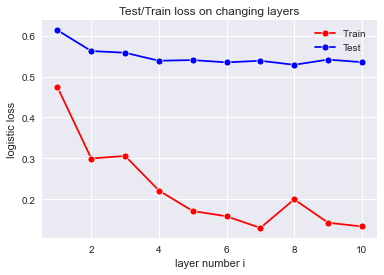

In [129]:
plt.xlabel('layer number i');
plt.ylabel('logistic loss');
# plt.ylim([0.0, 1]);

sns.lineplot(x = x_layer_index, y = y_layer_averloss_train, label = "Train ", color = "red", marker='o')
sns.lineplot(x = x_layer_index, y = y_layer_averloss_test,label = "Test", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Test/Train loss on changing layers')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

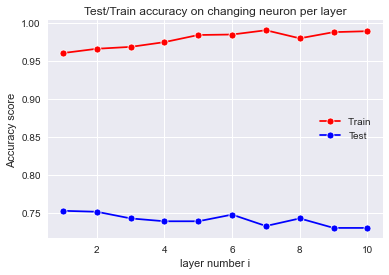

In [130]:
plt.xlabel('layer number i');
plt.ylabel('Accuracy score');
# plt.ylim([0.0, 1]);

sns.lineplot(x = x_layer_index, y = y_layer_score_train, label = "Train ", color = "red", marker='o')
sns.lineplot(x = x_layer_index, y = y_layer_score_test,label = "Test", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Test/Train accuracy on changing neuron per layer')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

## change neuron per layer  

In [122]:
x_neuron_index = np.array([2,3,4,5,6,7,8,9,10,11])
y_neuron_averloss_train = [aver_train_loss[i-2] for i in x_neuron_index]
y_neuron_averloss_test =  [aver_test_loss[i-2] for i in x_neuron_index]

y_neuron_score_train = [aver_train_score[i-2] for i in x_neuron_index]
y_neuron_score_test =  [aver_test_score[2115+30*(i-2)] for i in x_neuron_index]


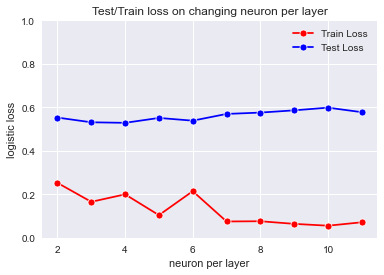

In [123]:
plt.xlabel('neuron per layer');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

sns.lineplot(x = x_neuron_index, y = y_neuron_averloss_train, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = x_neuron_index, y = y_neuron_averloss_test, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Test/Train loss on changing neuron per layer')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

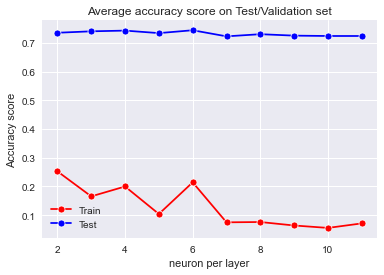

In [124]:
plt.xlabel('neuron per layer');
plt.ylabel('Accuracy score');
# plt.ylim([0.0, 1]);


sns.lineplot(x = x_neuron_index, y = y_neuron_averloss_train, label = "Train", color = "red", marker='o')
sns.lineplot(x = x_neuron_index, y = aver_test_score, label = "Test", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Average accuracy score on Test/Validation set')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

## change iteration 

NameError: name 'aver_train_los' is not defined

In [118]:
x_iteration_index = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
# y_iteration_averloss_train = [aver_train_loss[2130+i] for i in x_iteration_index]
# y_iteration_averloss_test =  [aver_test_loss[2130+i] for i in x_iteration_index]


y_iteration_score_train = [aver_train_score[i-1] for i in x_iteration_index]
y_iteration_score_test = [aver_test_score[i-1] for i in x_iteration_index]

# y_iteration_score_train = np.array([0.5,0.5,0.5,0.834375,0.916875,0.93, 0.933125,0.9425,0.95,0.956875,0.961875,0.96875,0.973125,0.975625, 0.979375,0.98375,0.98625,0.98875,0.98875,0.989375,0.99,0.991875,0.99375,0.994375, 0.995,0.995625, 0.996875,0.996875,0.9975])

# y_iteration_score_test =  np.array([0.5,0.5,0.5,0.62875,0.72875,0.73875,0.73875,0.74,0.7425,0.7375,0.73625,0.73875,0.74125,0.7425,0.7425,0.73875,0.73375,0.7325,0.72625,0.72375,0.7275,0.72625,0.725,0.7225,0.72375,0.7225,0.7225, 0.72125,0.7225])

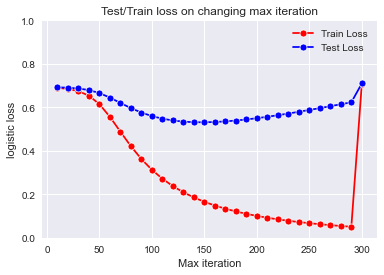

In [119]:
plt.xlabel('Max iteration');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

sns.lineplot(x = x_iteration_index*10, y = y_iteration_averloss_train, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = x_iteration_index*10, y = y_iteration_averloss_test, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Test/Train loss on changing max iteration')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

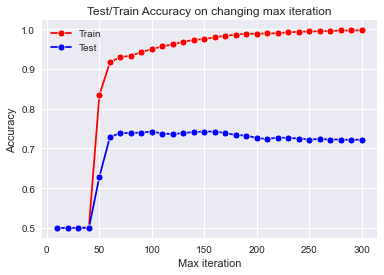

In [120]:
plt.xlabel('Max iteration');
plt.ylabel('Accuracy');
# plt.ylim([0.0, 1]);

sns.lineplot(x = x_iteration_index*10, y = y_iteration_score_train, label = "Train", color = "red", marker='o')
sns.lineplot(x = x_iteration_index*10, y = y_iteration_score_test, label = "Test", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Test/Train Accuracy on changing max iteration')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

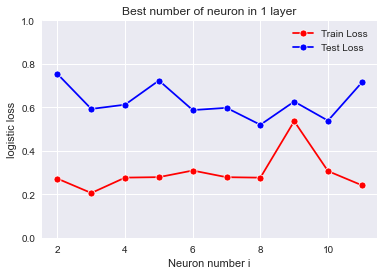

In [41]:
i_range = [2,3,4,5,6,7,8,9,10,11]
layer_range = [1,2,3,4,5,6,7,8,9,10]


for i in i_range:
    for l in layer_range:
        x_i = 
plt.xlabel('Neuron number i');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

sns.lineplot(x = i_range, y = aver_train_score, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = i_range, y = aver_test_score,label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Best number of neuron in 1 layer')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

## Relu

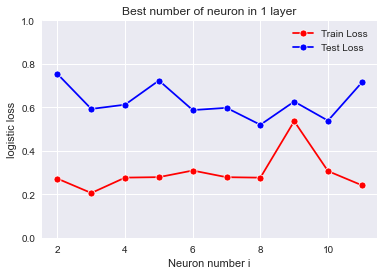

In [41]:
i_range = [2,3,4,5,6,7,8,9,10,11]
layer_range = [1,2,3,4,5,6,7,8,9,10]


for i in i_range:
    for l in layer_range:
        x_i = 
plt.xlabel('Neuron number i');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

sns.lineplot(x = i_range, y = aver_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = i_range, y = aver_test_loss,label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Best number of neuron in 1 layer')
plt.show()

# print("Best C-value for LR: %.3f" % best_C) 
# print("Test set log-loss at best C-value: %.4f" % min_loss)

In [ ]:
hidden_layer_range = 20
model_list = []
aver_train_score = []
aver_test_score = []
aver_train_loss = []
aver_test_loss = []


for t in range(10):
    for i in range(10):
        for iteration in range(30):
            k = 3
            kfold = KFold(n_splits=k)

            train_scores = []
            test_scores = []
            train_loss = []
            test_loss = []

            model = MLPClassifier(hidden_layer_sizes=(t+1,i+2), 
                            activation='relu',
                            solver='adam',
                            alpha=0.0001,
                            max_iter=(iteration+1)*10, tol=1e-6,
                            random_state=1)
            for train_idx, test_idx in kfold.split(X):
                X_train, X_test = X[train_idx,:], X[test_idx,:]
                y_train, y_test = y[train_idx], y[test_idx]

                model.fit(X_train, y_train)
                pred_train = model.predict_proba(X_train)
                pred_test = model.predict_proba(X_test)

                # Score
                score_train = model.score(X_train, y_train)
                score_test = model.score(X_test, y_test)
        #         print("Train score: ", score_train)
        #         print("Test score: ", score_test)
                train_scores.append(score_train)
                test_scores.append(score_test)

                # Log loss
                log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
                log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)

        #         print("Train loss: ", log_loss_train)
        #         print("Test loss: ", log_loss_test)
                train_loss.append(log_loss_train)
                test_loss.append(log_loss_test)

        #         with warnings.catch_warnings(record=True) as warn_list:
        #             print('finished LBFGS run :loss %.3f' % (
        #              model.loss_))


            print("For layers: ", t+1)
            print("For neurons: ", i+2)
            print("For iteration ", iteration)
            print("\nAverage train accuracy: ", np.average(score_train))
            print("Average test accuracy: ", np.average(score_test))
            print("\nAverage train loss: ", np.average(train_loss))
            print("Average test loss: ", np.average(test_loss))

            print('------------------------------------------------\n')

            model_list.append(model)
            aver_train_score.append(np.average(score_train))
            aver_test_score.append(np.average(score_test))
            aver_train_loss.append(np.average(train_loss))
            aver_test_loss.append(np.average(test_loss))

# Cross Validation 

### stability over k folds 

In [86]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

K = [2,3,4,5,8,10]
K_train_loss = []
K_test_loss = []
for k in K:
    kfold = KFold(n_splits=k)
    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []
    
    for train_idx, test_idx in kfold.split(X):
        shuffler = np.random.permutation(len(X))
        X_shuffled = X[shuffler]
        y_shuffled = y[shuffler]
        X_train, X_test = X_shuffled[train_idx,:], X_shuffled[test_idx,:]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]

        model.fit(X_train, y_train)
        pred_train = best_model.predict_proba(X_train)
        pred_test = best_model.predict_proba(X_test)

        score_train = best_model.score(X_train, y_train)
        score_test = best_model.score(X_test, y_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
        
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)

    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("Average train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))
    
    K_train_loss.append(np.average(train_loss))
    K_test_loss.append(np.average(test_loss))

-----------------
Classify with base data, 5 folds
-----------------

Average train accuracy:  0.9108333333333334
Average test accuracy:  0.8933333333333333
Average train loss:  0.2855729771739258
Average test loss:  0.29108663560482273

Average train accuracy:  0.8975
Average test accuracy:  0.91125
Average train loss:  0.28926782520393757
Average test loss:  0.2864537687602477

Average train accuracy:  0.9
Average test accuracy:  0.9083333333333333
Average train loss:  0.2871247872285715
Average test loss:  0.29194486387178264

Average train accuracy:  0.9046875
Average test accuracy:  0.8916666666666667
Average train loss:  0.2880740786474457
Average test loss:  0.2893527173570883

Average train accuracy:  0.9047619047619048
Average test accuracy:  0.8833333333333333
Average train loss:  0.2880419294442421
Average test loss:  0.29034494500529956

Average train accuracy:  0.9013888888888889
Average test accuracy:  0.9083333333333333
Average train loss:  0.2887668867616243
Average tes

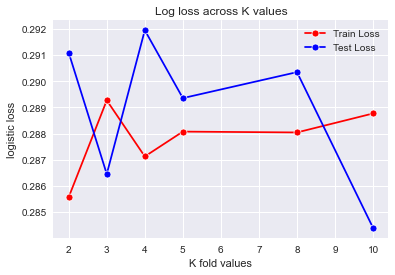

standard deviation for training set: 0.001  
standard deviation for testing set: 0.003  


In [87]:
plt.xlabel('K fold values');
plt.ylabel('logistic loss');

sns.lineplot(x = K, y = K_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = K, y = K_test_loss, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Log loss across K values')
plt.show()


print('standard deviation for training set: %.3f  ' %np.std(K_train_loss))
print('standard deviation for testing set: %.3f  ' %np.std(K_test_loss))

### CV with the best C

In [ ]:
# print out the results in clear tabular format
pd.DataFrame(np.transpose([aver_train_score, aver_test_score, aver_train_loss, aver_test_loss]), columns=['train accuracy', 'test accuracy', 'train loss', 'test loss'])

#### Best Log loss

In [ ]:
min_loss = min(aver_test_loss)
index_N2 = aver_test_loss.index(min_loss)
best_C =  C_grid[index_N2]
best_model = model_list[index_N2]

#### stability across Kfolds

In [ ]:
print("-----------------\nClassify with base data, 5 folds\n-----------------")

K = [2,3,4,5,6,7,8,9,10,11,12]
K_train_loss = []
K_test_loss = []
for k in K:
    kfold = KFold(n_splits=k)
    train_scores = []
    test_scores = []
    train_loss = []
    test_loss = []
    
    for train_idx, test_idx in kfold.split(X):
        shuffler = np.random.permutation(len(X))
        X_shuffled = X[shuffler]
        y_shuffled = y[shuffler]
        X_train, X_test = X_shuffled[train_idx,:], X_shuffled[test_idx,:]
        y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]

        model.fit(X_train, y_train)
        pred_train = best_model.predict_proba(X_train)
        pred_test = best_model.predict_proba(X_test)

        score_train = best_model.score(X_train, y_train)
        score_test = best_model.score(X_test, y_test)
        train_scores.append(score_train)
        test_scores.append(score_test)
        
        log_loss_train = sklearn.metrics.log_loss(y_train,pred_train)
        log_loss_test = sklearn.metrics.log_loss(y_test,pred_test)
        
        train_loss.append(log_loss_train)
        test_loss.append(log_loss_test)

    print("\nAverage train accuracy: ", np.average(score_train))
    print("Average test accuracy: ", np.average(score_test))
    print("Average train loss: ", np.average(train_loss))
    print("Average test loss: ", np.average(test_loss))
    
    K_train_loss.append(np.average(train_loss))
    K_test_loss.append(np.average(test_loss))

In [ ]:
plt.xlabel('K from 2 to 12');
plt.ylabel('logistic loss');

sns.lineplot(x = K, y = K_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = K, y = K_test_loss, label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Log loss across K values')
plt.show()


print('standard deviation for training set: %.3f  ' %np.std(K_train_loss))
print('standard deviation for testing set: %.3f  ' %np.std(K_test_loss))

In [ ]:
plt.xlabel('log10(C)');
plt.ylabel('logistic loss');
plt.ylim([0.0, 1]);

sns.lineplot(x = np.log10(C_grid), y = aver_train_loss, label = "Train Loss", color = "red", marker='o')
sns.lineplot(x = np.log10(C_grid), y = aver_test_loss,label = "Test Loss", color = "blue", marker='o')

# show a legend on the plot 
plt.legend() 
plt.title('Logistic loss on C-grid')
plt.show()

print("Best C-value for LR: %.3f" % best_C) 
print("Test set log-loss at best C-value: %.4f" % min_loss)

#### Result

In [89]:
yproba1_test = best_model.predict_proba(x_te)[:, 1] 
np.savetxt('yproba1_test.txt', yproba1_test)

# Neuronetwork

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

In [ ]:
n_runs = 16
tr_classifierLBFS = list()

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        clf = mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
        
    tr_classifierLBFS.append(clf)

In [131]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
parameters = {}

model = MLPClassifier(hidden_layer_sizes=(8,4), 
                            activation='relu',
                            solver='adam',
                            alpha=0.0001,
                            max_iter=160, tol=1e-6,
                            random_state=1)

clf = GridSearchCV(model, parameters,cv=3)
clf.fit(X,y)
clf.cv_results_

{'mean_fit_time': array([2.47359045]),
 'std_fit_time': array([0.26363435]),
 'mean_score_time': array([0.01352191]),
 'std_score_time': array([0.01492832]),
 'params': [{}],
 'split0_test_score': array([0.6775]),
 'split1_test_score': array([0.665]),
 'split2_test_score': array([0.66375]),
 'mean_test_score': array([0.66875]),
 'std_test_score': array([0.00620819]),
 'rank_test_score': array([1], dtype=int32)}